# Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sys
from pathlib import Path
from scipy.interpolate import interp1d
%matplotlib notebook
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.graph_objects as go
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import folium
from shapely.geometry import Point
from shapely import wkt
#Libraries of debugging
import warnings
import seaborn as sns
import missingno as msno
from mpl_toolkits.axes_grid1 import make_axes_locatable
import petroeval as pet
from mpl_toolkits.mplot3d import Axes3D

# Importing dataset

In [5]:
data = pd.read_csv(r"C:\Users\lenovo\Downloads\combined_file.csv")

In [6]:
data

DEPT  GR         SP     DEN     RESDEP  Facies Well_name  POR
0       6000.5 NaN  66.972198     NaN  29.332199     NaN    OBOM-1  NaN
1       6001.0 NaN  68.073502     NaN  29.910801     NaN    OBOM-1  NaN
2       6001.5 NaN  69.331200     NaN  30.260401     NaN    OBOM-1  NaN
3       6002.0 NaN  69.508698     NaN  30.720100     NaN    OBOM-1  NaN
4       6002.5 NaN  69.644501     NaN  31.182800     NaN    OBOM-1  NaN
...        ...  ..        ...     ...        ...     ...       ...  ...
284988  9844.0 NaN        NaN  2.0637        NaN     NaN   OBOM-14  NaN
284989  9844.5 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN
284990  9845.0 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN
284991  9845.5 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN
284992  9846.0 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN

[284993 rows x 8 columns]

In [7]:
data.keys()

Index(['DEPT', 'GR', 'SP', 'DEN', 'RESDEP', 'Facies', 'Well_name', 'POR'], dtype='object')

In [8]:
data['Well_name'].unique()

array(['OBOM-1', 'OBOM-2', 'OBOM-3', 'OBOM-4', 'OBOM-5', 'OBOM-6',
       'OBOM-7', 'OBOM-8', 'OBOM-9', 'OBOM-10', 'OBOM-11', 'OBOM-12',
       'OBOM-13', 'OBOM-14'], dtype=object)

In [9]:
data['Well_name'].unique()

array(['OBOM-1', 'OBOM-2', 'OBOM-3', 'OBOM-4', 'OBOM-5', 'OBOM-6',
       'OBOM-7', 'OBOM-8', 'OBOM-9', 'OBOM-10', 'OBOM-11', 'OBOM-12',
       'OBOM-13', 'OBOM-14'], dtype=object)

In [10]:
data['Facies'].value_counts()

0.0    71061
2.0    28665
1.0    28276
3.0     3200
4.0     1382
Name: Facies, dtype: int64

**Data pre-processing and cleaning**

The lithofacies described are encoded into numbers, this numbers were converted back to facies type.

In [11]:
lithology_keys = {0.0: 'Shale',
                 1.0: 'Channels',
                 2.0: 'USF',
                 3.0: 'LSF',
                 4.0: 'HT'}

# Map numeric lithology codes to descriptions


In [12]:
data['lithofacies'] = data['Facies'].map(lithology_keys)

In [13]:
data.rename(columns={'DEPT': 'Depth'}, inplace=True)

In [14]:
data

Depth  GR         SP     DEN     RESDEP  Facies Well_name  POR  \
0       6000.5 NaN  66.972198     NaN  29.332199     NaN    OBOM-1  NaN   
1       6001.0 NaN  68.073502     NaN  29.910801     NaN    OBOM-1  NaN   
2       6001.5 NaN  69.331200     NaN  30.260401     NaN    OBOM-1  NaN   
3       6002.0 NaN  69.508698     NaN  30.720100     NaN    OBOM-1  NaN   
4       6002.5 NaN  69.644501     NaN  31.182800     NaN    OBOM-1  NaN   
...        ...  ..        ...     ...        ...     ...       ...  ...   
284988  9844.0 NaN        NaN  2.0637        NaN     NaN   OBOM-14  NaN   
284989  9844.5 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN   
284990  9845.0 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN   
284991  9845.5 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN   
284992  9846.0 NaN        NaN  2.0659        NaN     NaN   OBOM-14  NaN   

       lithofacies  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
284988         NaN  
284989         NaN  
284990         NaN  
284991         NaN  
284992         NaN  

[284993 rows x 9 columns]

In [15]:
data.describe()

Depth             GR            SP            DEN  \
count  284993.000000  137433.000000  1.850060e+05  191574.000000   
mean     6121.225714      75.917487 -2.140893e+12   -3781.249699   
std      3370.370044      29.295701  9.200004e+14    4850.311670   
min         0.000000      -2.791200 -3.957134e+17   -9999.000000   
25%      3239.000000      49.706200 -9.999000e+03   -9999.000000   
50%      6375.500000      83.524597  3.392499e+01       2.234700   
75%      8920.000000      97.412003  6.274829e+01       2.450600   
max     13152.000000     272.250000  1.753600e+04       2.788714   

              RESDEP         Facies           POR  
count  157650.000000  132584.000000  22551.000000  
mean       21.414959       0.759775      0.214830  
std        64.383981       0.940652      0.112068  
min         0.000000       0.000000      0.036800  
25%         2.832050       0.000000      0.072000  
50%         5.764900       0.000000      0.225900  
75%        15.624975       2.000000      0.318000  
max      8728.500977       4.000000      0.406000

In [16]:
data.isnull().sum()

Depth               0
GR             147560
SP              99987
DEN             93419
RESDEP         127343
Facies         152409
Well_name           0
POR            262442
lithofacies    152409
dtype: int64

In [17]:
data.corr()

Depth        GR        SP       DEN    RESDEP    Facies       POR
Depth   1.000000  0.292096 -0.001498  0.705276 -0.180404 -0.223918 -0.108476
GR      0.292096  1.000000  0.008270 -0.133499 -0.250657 -0.528915 -0.215330
SP     -0.001498  0.008270  1.000000 -0.002206  0.001144 -0.000903 -0.266316
DEN     0.705276 -0.133499 -0.002206  1.000000 -0.149678  0.121022 -0.159709
RESDEP -0.180404 -0.250657  0.001144 -0.149678  1.000000  0.146030  0.095201
Facies -0.223918 -0.528915 -0.000903  0.121022  0.146030  1.000000  0.113984
POR    -0.108476 -0.215330 -0.266316 -0.159709  0.095201  0.113984  1.000000

<IPython.core.display.Javascript object>


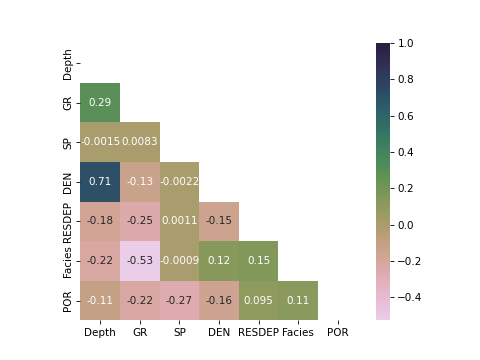

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(method='pearson'), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a color map
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Plot the heatmap
sns.heatmap(data.corr(method='pearson'), annot=True, mask=mask, cmap=cmap, vmax=1.0, square=True)

# Show the plot
plt.show()

In [19]:
obom_1=data[data['Well_name']=='OBOM-1']
obom_1

Depth         GR         SP     DEN     RESDEP  Facies Well_name  \
0       6000.5        NaN  66.972198     NaN  29.332199     NaN    OBOM-1   
1       6001.0        NaN  68.073502     NaN  29.910801     NaN    OBOM-1   
2       6001.5        NaN  69.331200     NaN  30.260401     NaN    OBOM-1   
3       6002.0        NaN  69.508698     NaN  30.720100     NaN    OBOM-1   
4       6002.5        NaN  69.644501     NaN  31.182800     NaN    OBOM-1   
...        ...        ...        ...     ...        ...     ...       ...   
11945  11973.0  88.999199  70.903198  2.5255   0.945000     0.0    OBOM-1   
11946  11973.5  88.840897  70.903900  2.5254   0.945000     0.0    OBOM-1   
11947  11974.0  88.177002  70.905197  2.5251   0.945000     0.0    OBOM-1   
11948  11974.5  84.952003  70.905800  2.5237   0.945000     0.0    OBOM-1   
11949  11975.0  82.350899  70.907097  2.5218   0.945000     0.0    OBOM-1   

       POR lithofacies  
0      NaN         NaN  
1      NaN         NaN  
2      NaN         NaN  
3      NaN         NaN  
4      NaN         NaN  
...    ...         ...  
11945  NaN       Shale  
11946  NaN       Shale  
11947  NaN       Shale  
11948  NaN       Shale  
11949  NaN       Shale  

[11950 rows x 9 columns]

In [20]:
obom_1.describe()

Depth            GR            SP           DEN        RESDEP  \
count  11950.000000  10950.000000  11950.000000  10951.000000  11950.000000   
mean    8987.750000     78.825935     56.484374      2.465786     20.612392   
std     1724.906096     23.835167     17.161628      0.100744     32.802938   
min     6000.500000      0.000000     -0.920400      2.210800      0.630000   
25%     7494.125000     61.983424     45.782125      2.433200      3.843000   
50%     8987.750000     85.264503     59.293499      2.523900      6.941300   
75%    10481.375000     94.495399     69.382753      2.527100     23.442850   
max    11975.000000    168.975906     99.887802      2.534100    198.644394   

             Facies  POR  
count  10940.000000  0.0  
mean       0.771938  NaN  
std        0.989015  NaN  
min        0.000000  NaN  
25%        0.000000  NaN  
50%        0.000000  NaN  
75%        2.000000  NaN  
max        4.000000  NaN

In [21]:
data['lithofacies'].value_counts()

Shale       71061
USF         28665
Channels    28276
LSF          3200
HT           1382
Name: lithofacies, dtype: int64

In [22]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


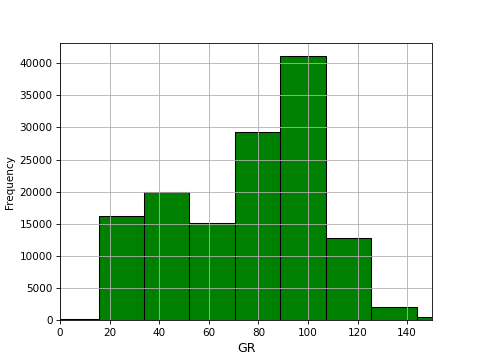

In [23]:
plt.hist(data.GR.dropna(), bins=15, color='g', edgecolor='k')
plt.xlabel('GR', fontsize=12)
plt.ylabel('Frequency')
plt.xlim(0,150)
plt.grid(True)
plt.show()

In [24]:
col_list = ['Facies', 'GR', 'RESDEP', 'DEN', 'SP']
plt.figure(figsize=(8, 10))
i = 0

for col in col_list:
    i += 1
    plt.subplot(3, 2, i)  # Assuming you want 3 rows and 2 columns of subplots
    plt.hist(data[col])
    plt.title(col)

plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()  # Ensure plt.show() is called after the loop

<IPython.core.display.Javascript object>

Trying to view and understand the distribution of the data set wiith and its relationship to the other logs we can see that this data set of facies only have relationship with the GR logs. hence other logs will be dropped.

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= data['lithofacies'], y= data['SP'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

In [26]:
# Assuming 'data' is your DataFrame
data = data[data['SP'] > -3]

In [27]:
# Assuming 'data' is your DataFrame
data = data[data['SP'] < 2500]

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= data['lithofacies'], y= data['SP'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= data['lithofacies'], y= data['RESDEP'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

In [30]:
# Assuming 'data' is your DataFrame
data = data[data['RESDEP'] < 4000]

<IPython.core.display.Javascript object>


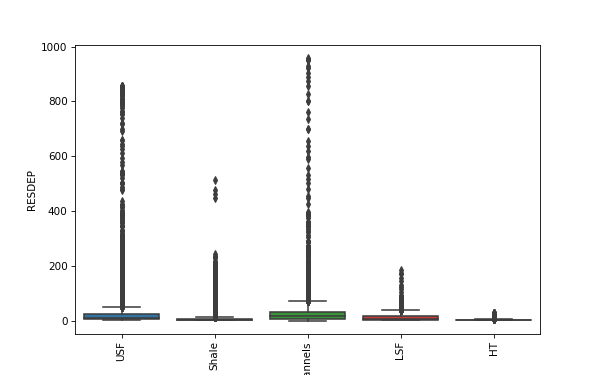

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= data['lithofacies'], y= data['RESDEP'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


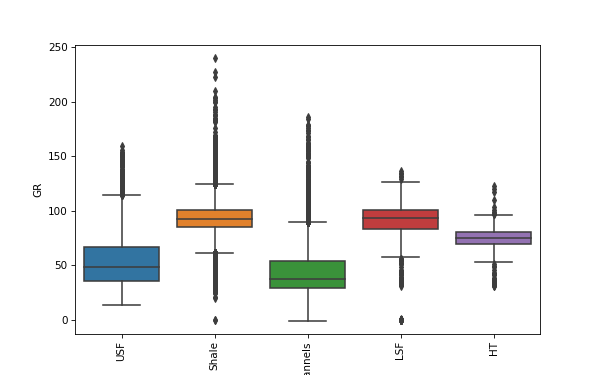

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= data['lithofacies'], y= data['GR'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


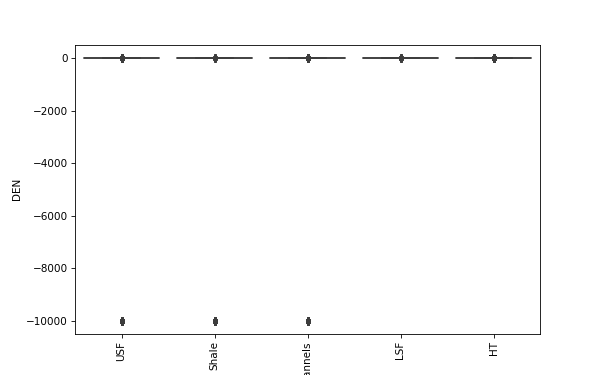

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= data['lithofacies'], y= data['DEN'])
plt.xticks(rotation=90)
plt.show()

In [34]:
# Assuming 'data' is your DataFrame
data = data[data['DEN'] > -4000]

In [35]:
# Assuming 'data' is your DataFrame
data = data[data['DEN'] > 0]

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= data['lithofacies'], y= data['DEN'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

In [37]:
# code is your DataFrame and 'Facies' is the column
data.dropna(subset=['Facies'], inplace=True)

In [38]:
import plotly.graph_objects as go

In [39]:
data.isnull().sum()

Depth              0
GR               158
SP                 0
DEN                0
RESDEP             0
Facies             0
Well_name          0
POR            57390
lithofacies        0
dtype: int64

In [40]:
data.dropna(subset=['GR'], inplace=True)

<IPython.core.display.Javascript object>


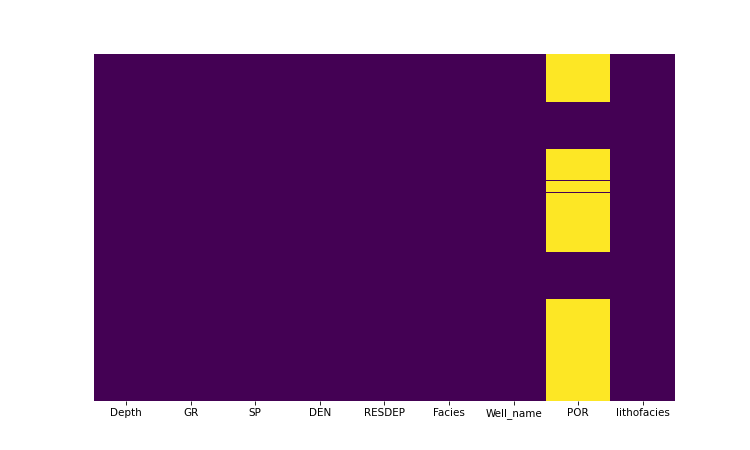

In [41]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [42]:
data['Facies'].isnull().sum()

0

In [43]:
# changing facies code from float to integer
data['Facies'] = data['Facies'].astype(int)

In [44]:
data

Depth          GR         SP     DEN     RESDEP  Facies Well_name  \
1000    6500.5   40.834099  71.804199  2.2734  27.702000       2    OBOM-1   
1001    6501.0   45.631100  71.661797  2.3010  27.178900       2    OBOM-1   
1002    6501.5   47.282700  71.489899  2.3119  26.382900       2    OBOM-1   
1003    6502.0   51.463501  71.490196  2.3446  25.580299       2    OBOM-1   
1004    6502.5   55.879501  70.979301  2.3817  24.596100       2    OBOM-1   
...        ...         ...        ...     ...        ...     ...       ...   
258066  8798.0   91.050003  54.827770  2.3881   9.135000       0   OBOM-13   
258067  8798.5   92.940002  55.007641  2.4652   9.322400       0   OBOM-13   
258068  8799.0   95.302498  55.187481  2.5110   9.607500       0   OBOM-13   
258069  8799.5  100.500000  53.612499  2.5111   9.670500       0   OBOM-13   
258070  8800.0  101.208702  53.447491  2.5111   9.607500       0   OBOM-13   

        POR lithofacies  
1000    NaN         USF  
1001    NaN         USF  
1002    NaN         USF  
1003    NaN         USF  
1004    NaN         USF  
...     ...         ...  
258066  NaN       Shale  
258067  NaN       Shale  
258068  NaN       Shale  
258069  NaN       Shale  
258070  NaN       Shale  

[79746 rows x 9 columns]

In [45]:
#  #Creating a labeling library for each facies with their respective colors and labels.
facies_colors = ['#FF0000', '#00FF00', '#0000FF', '#808080', '#FFFF00']
facies_labels = ['Channels','USF','LSF','HT','SH']

#facies_color_map is a dictionary to map facies labels to their respective colors.
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[row['Facies'] -1]

data.loc[:,'Facies_Labels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [46]:
data

Depth          GR         SP     DEN     RESDEP  Facies Well_name  \
1000    6500.5   40.834099  71.804199  2.2734  27.702000       2    OBOM-1   
1001    6501.0   45.631100  71.661797  2.3010  27.178900       2    OBOM-1   
1002    6501.5   47.282700  71.489899  2.3119  26.382900       2    OBOM-1   
1003    6502.0   51.463501  71.490196  2.3446  25.580299       2    OBOM-1   
1004    6502.5   55.879501  70.979301  2.3817  24.596100       2    OBOM-1   
...        ...         ...        ...     ...        ...     ...       ...   
258066  8798.0   91.050003  54.827770  2.3881   9.135000       0   OBOM-13   
258067  8798.5   92.940002  55.007641  2.4652   9.322400       0   OBOM-13   
258068  8799.0   95.302498  55.187481  2.5110   9.607500       0   OBOM-13   
258069  8799.5  100.500000  53.612499  2.5111   9.670500       0   OBOM-13   
258070  8800.0  101.208702  53.447491  2.5111   9.607500       0   OBOM-13   

        POR lithofacies Facies_Labels  
1000    NaN         USF           USF  
1001    NaN         USF           USF  
1002    NaN         USF           USF  
1003    NaN         USF           USF  
1004    NaN         USF           USF  
...     ...         ...           ...  
258066  NaN       Shale            SH  
258067  NaN       Shale            SH  
258068  NaN       Shale            SH  
258069  NaN       Shale            SH  
258070  NaN       Shale            SH  

[79746 rows x 10 columns]

In [47]:
facies_colors = [ '#808080', '#FF0000', '#FFFF00', '#00FF00', '#0000FF', '#808080']

<IPython.core.display.Javascript object>


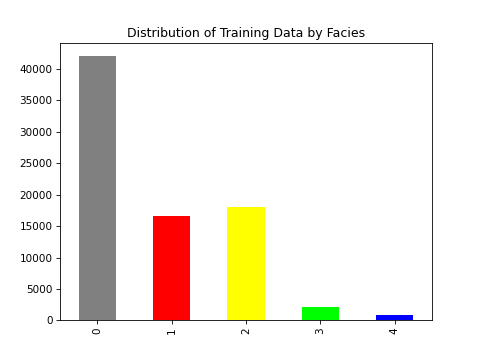

In [48]:
#Bar chart total facies pada data training
facies_counts = data['Facies'].value_counts().sort_index()
facies_counts.plot(kind='bar',color=facies_colors,
                   title='Distribution of Training Data by Facies')
plt.show()

<IPython.core.display.Javascript object>


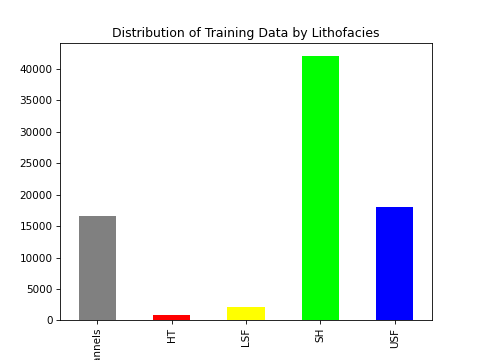

In [49]:
# Assuming 'data' is your DataFrame and 'Lithofacies' is the column of interest
facies_counts = data['Facies_Labels'].value_counts().sort_index()

# Plotting the bar chart
facies_counts.plot(kind='bar', color=facies_colors, title='Distribution of Training Data by Lithofacies')
plt.show()

In [50]:
 data['Facies_Labels'].value_counts().sort_index()
    
    
    
    

Channels    16535
HT            890
LSF          2201
SH          42003
USF         18117
Name: Facies_Labels, dtype: int64

<IPython.core.display.Javascript object>


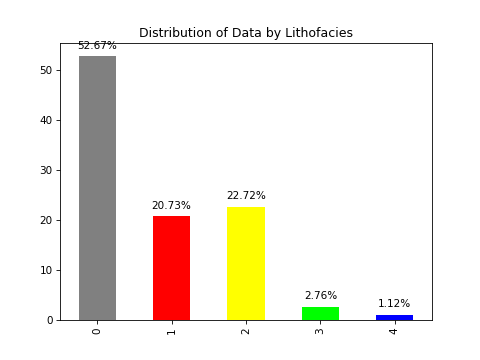

In [51]:


# Assuming 'data' is your DataFrame and 'Lithofacies' is the column of interest
facies_pers = data['Facies'].value_counts().sort_index()

# Calculate the percentage
facies_percentage = facies_pers / facies_pers.sum() * 100

# Plotting the bar chart with percentage labels
ax = facies_percentage.plot(kind='bar', color=facies_colors, title='Distribution of Data by Lithofacies')

# Add percentage labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [52]:
data['Facies_Labels'].value_counts()

SH          42003
USF         18117
Channels    16535
LSF          2201
HT            890
Name: Facies_Labels, dtype: int64

In [53]:
data['Well_name'].unique()

array(['OBOM-1', 'OBOM-2', 'OBOM-3', 'OBOM-4', 'OBOM-5', 'OBOM-6',
       'OBOM-7', 'OBOM-8', 'OBOM-9', 'OBOM-13'], dtype=object)

In [54]:
# Creating a column for reservoir and non reservoir
data['Reservoir_Status'] = np.where(data['Facies_Labels'].isin(['Channels', 'LSF', 'USF', 'HT']), 'Reservoir', 'Non-Reservoir')
data.head()

Depth         GR         SP     DEN     RESDEP  Facies Well_name  POR  \
1000  6500.5  40.834099  71.804199  2.2734  27.702000       2    OBOM-1  NaN   
1001  6501.0  45.631100  71.661797  2.3010  27.178900       2    OBOM-1  NaN   
1002  6501.5  47.282700  71.489899  2.3119  26.382900       2    OBOM-1  NaN   
1003  6502.0  51.463501  71.490196  2.3446  25.580299       2    OBOM-1  NaN   
1004  6502.5  55.879501  70.979301  2.3817  24.596100       2    OBOM-1  NaN   

     lithofacies Facies_Labels Reservoir_Status  
1000         USF           USF        Reservoir  
1001         USF           USF        Reservoir  
1002         USF           USF        Reservoir  
1003         USF           USF        Reservoir  
1004         USF           USF        Reservoir

In [55]:
data['SP'] = data['SP'].replace(-9999.000000, np.nan)

In [56]:
data.isnull().sum()

Depth                   0
GR                      0
SP                      0
DEN                     0
RESDEP                  0
Facies                  0
Well_name               0
POR                 57232
lithofacies             0
Facies_Labels           0
Reservoir_Status        0
dtype: int64

In [57]:
data['Reservoir_Status'].value_counts()

Non-Reservoir    42003
Reservoir        37743
Name: Reservoir_Status, dtype: int64

$$
Reservoir Percentage = \frac{\text{Reservoir}}{\text{Reservoir + Non-Reservoir}} \times 100
$$

<IPython.core.display.Javascript object>


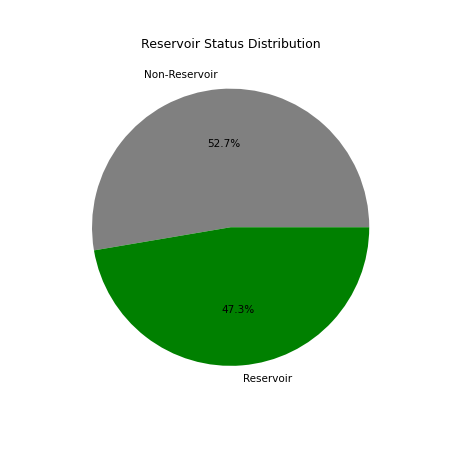

In [58]:
# Count the occurrences of each category in 'Reservoir_Status'
status_counts = data['Reservoir_Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['grey', 'green'])
plt.title('Reservoir Status Distribution')

# Show the plot
plt.show()

In [58]:


# Assuming 'data' is your DataFrame containing lithofacies, GR, RESDEP, DEN, SP
vars_of_interest = ['Facies_Labels', 'GR', 'RESDEP', 'DEN', 'SP','Facies']

facies_colors = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]
# Subset the DataFrame to include only the variables of interest
subset_data = data[vars_of_interest]

# Use pairplot to create a plot matrix
sns.pairplot(subset_data, hue='Facies_Labels', palette=facies_colors)
plt.suptitle('Plot Matrix of Lithofacies and Well Log Variables', y=1.02)
plt.show()

<IPython.core.display.Javascript object>

In [55]:
obom_13 = data[data['Well_name'] == 'OBOM-13']
obom_13


Depth          GR         SP     DEN  RESDEP  Facies Well_name  POR  \
253670  6600.0   97.428703  52.037491  2.3531  3.9375       0   OBOM-13  NaN   
253671  6600.5   98.610001  52.824970  2.3577  3.7758       0   OBOM-13  NaN   
253672  6601.0   98.997498  54.399979  2.3456  3.5595       0   OBOM-13  NaN   
253673  6601.5   99.318703  54.399979  2.3021  3.5595       0   OBOM-13  NaN   
253674  6602.0   98.137497  53.529919  2.2960  3.7493       0   OBOM-13  NaN   
...        ...         ...        ...     ...     ...     ...       ...  ...   
258066  8798.0   91.050003  54.827770  2.3881  9.1350       0   OBOM-13  NaN   
258067  8798.5   92.940002  55.007641  2.4652  9.3224       0   OBOM-13  NaN   
258068  8799.0   95.302498  55.187481  2.5110  9.6075       0   OBOM-13  NaN   
258069  8799.5  100.500000  53.612499  2.5111  9.6705       0   OBOM-13  NaN   
258070  8800.0  101.208702  53.447491  2.5111  9.6075       0   OBOM-13  NaN   

       lithofacies Facies_Labels Reservoir_Status  
253670       Shale            SH    Non-Reservoir  
253671       Shale            SH    Non-Reservoir  
253672       Shale            SH    Non-Reservoir  
253673       Shale            SH    Non-Reservoir  
253674       Shale            SH    Non-Reservoir  
...            ...           ...              ...  
258066       Shale            SH    Non-Reservoir  
258067       Shale            SH    Non-Reservoir  
258068       Shale            SH    Non-Reservoir  
258069       Shale            SH    Non-Reservoir  
258070       Shale            SH    Non-Reservoir  

[4390 rows x 11 columns]

In [56]:
# To evaluate the accuracy of the classifier,
# we will remove one well from the training set so that we can compare 
# the predicted and actual facies labels.
blind = data[data['Well_name'] == 'OBOM-4']
data = data[data['Well_name'] != 'OBOM-4']
blind

Depth         GR         SP     DEN   RESDEP  Facies Well_name  POR  \
57269   6000.0  63.408699  50.769791  2.5055  10.3935       1    OBOM-4  NaN   
57270   6000.5  61.046200  50.454269  2.4960  11.3384       1    OBOM-4  NaN   
57271   6001.0  60.337502  50.295261  2.4926  12.1888       1    OBOM-4  NaN   
57272   6001.5  62.227501  49.980999  2.5010  13.3857       1    OBOM-4  NaN   
57273   6002.0  63.753399  49.813370  2.5067  13.9715       1    OBOM-4  NaN   
...        ...        ...        ...     ...      ...     ...       ...  ...   
66059  10395.0  78.927101  71.144638  2.5257   1.2069       0    OBOM-4  NaN   
66060  10395.5  80.227798  71.143333  2.5261   1.2066       0    OBOM-4  NaN   
66061  10396.0  81.292999  70.670181  2.5264   1.2065       0    OBOM-4  NaN   
66062  10396.5  82.869102  70.353928  2.5269   1.2062       0    OBOM-4  NaN   
66063  10397.0  86.020699  70.568787  2.5278   1.2344       0    OBOM-4  NaN   

      lithofacies Facies_Labels Reservoir_Status  
57269    Channels      Channels        Reservoir  
57270    Channels      Channels        Reservoir  
57271    Channels      Channels        Reservoir  
57272    Channels      Channels        Reservoir  
57273    Channels      Channels        Reservoir  
...           ...           ...              ...  
66059       Shale            SH    Non-Reservoir  
66060       Shale            SH    Non-Reservoir  
66061       Shale            SH    Non-Reservoir  
66062       Shale            SH    Non-Reservoir  
66063       Shale            SH    Non-Reservoir  

[8781 rows x 11 columns]

In [57]:
# Save the DataFrame to a CSV file
blind.to_csv('blind.csv', index=False) 

In [70]:


# Assuming 'data' is your DataFrame containing lithofacies, GR, DEN, SP
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for lithofacies
colors = facies_colors
facies_colors = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Scatter plot for each lithofacies
for Facies_Labels, color in zip(data['Facies_Labels'].unique(), colors):
    subset_data = data[data['Facies_Labels'] == Facies_Labels]
    ax.scatter(subset_data['GR'], subset_data['DEN'], subset_data['SP'], label=f'Facies_Labels {Facies_Labels}', color=color, s=20)

# Set labels and title
ax.set_xlabel('GR [gAPI]')
ax.set_ylabel('DEN [g/m3]')
ax.set_zlabel('SP [mV]')
ax.set_title('3D Plot of GR, DEN, and SP Sorted by Lithofacies')

# Add legend
ax.legend()

# Show the plot
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


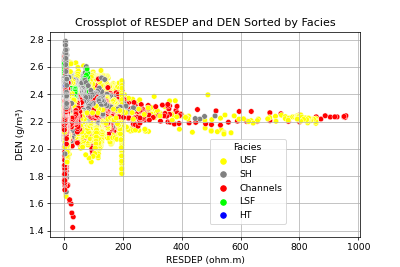

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'Facies' with the actual column name containing facies information

plt.figure(figsize=(6, 4))

# Scatter plot with different colors for each facies
sns.scatterplot(x='RESDEP', y='DEN', hue='Facies_Labels', data=data, palette=facies_colors)

plt.xlabel('RESDEP (ohm.m)')
plt.ylabel('DEN (g/m³)')
plt.title('Crossplot of RESDEP and DEN Sorted by Facies')

plt.legend(title='Facies', bbox_to_anchor=(0.5, 0.5), loc='upper left')

plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


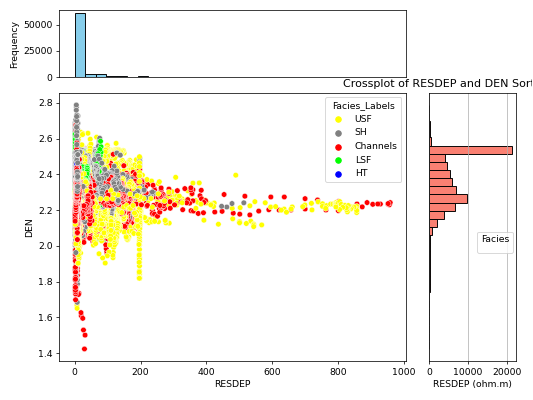

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'Facies' with the actual column name containing facies information

plt.figure(figsize=(8, 6))

facies_colors = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Create 2x2 grid for the main plot and histograms
gs = plt.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])

# Scatter plot with different colors for each facies
ax_main = plt.subplot(gs[1, 0])
sns.scatterplot(x='RESDEP', y='DEN', hue='Facies_Labels', data=data, palette=facies_colors, ax=ax_main)

# Histogram for RESDEP along the top
ax_top = plt.subplot(gs[0, 0], sharex=ax_main)
ax_top.hist(data['RESDEP'], bins=30, color='skyblue', edgecolor='black')
ax_top.set(ylabel='Frequency')
ax_top.get_xaxis().set_visible(False)  # Hide x-axis labels

# Histogram for DEN along the right
ax_right = plt.subplot(gs[1, 1], sharey=ax_main)
ax_right.hist(data['DEN'], bins=30, color='salmon', edgecolor='black', orientation='horizontal')
ax_right.set(xlabel='Frequency')
ax_right.get_yaxis().set_visible(False)  # Hide y-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()

plt.xlabel('RESDEP (ohm.m)')
plt.ylabel('DEN (g/m³)')
plt.title('Crossplot of RESDEP and DEN Sorted by Facies')

plt.legend(title='Facies', bbox_to_anchor=(0.5, 0.5), loc='upper left')

plt.grid(True)
plt.show()

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'Facies' with the actual column name containing facies information

plt.figure(figsize=(8, 6))

# Create 2x2 grid for the main plot and histograms
gs = plt.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])

# Scatter plot with different colors for each facies
ax_main = plt.subplot(gs[1, 0])
sns.scatterplot(x='RESDEP', y='DEN', hue='Facies_Labels', data=data, palette=facies_colors, ax=ax_main)

# Histogram for RESDEP along the top, sorted by facies
ax_top = plt.subplot(gs[0, 0], sharex=ax_main)
sns.histplot(data, x='RESDEP', bins=30, color='skyblue', edgecolor='black', hue='Facies_Labels', multiple='stack', ax=ax_top)
ax_top.set(ylabel='Frequency')
ax_top.get_xaxis().set_visible(False)  # Hide x-axis labels

# Histogram for DEN along the right, sorted by facies
ax_right = plt.subplot(gs[1, 1], sharey=ax_main)
sns.histplot(data, y='DEN', bins=30, color='salmon', edgecolor='black', hue='Facies_Labels', multiple='stack', ax=ax_right)
ax_right.set(xlabel='Frequency')
ax_right.get_yaxis().set_visible(False)  # Hid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


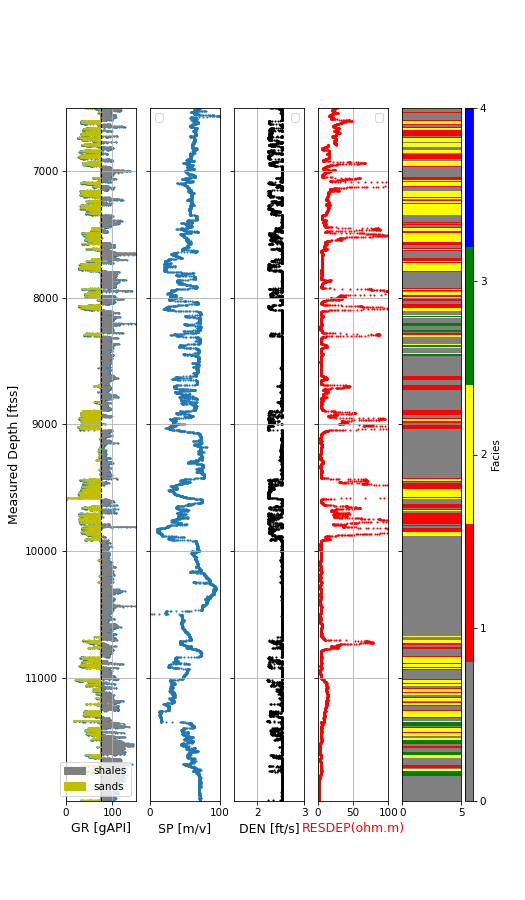

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [59]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom1_data = data[data['Well_name'] == 'OBOM-1']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom1_data['GR'], obom1_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom1_data['Depth'], obom1_data['GR'], 75,
                 where=obom1_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom1_data['Depth'], obom1_data['GR'], 75,
                 where=obom1_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom1_data['SP'], obom1_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom1_data['DEN'], obom1_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom1_data['RESDEP'], obom1_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom1_data['Facies_color'] = obom1_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom1_data['Facies'], obom1_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom1_data['Depth']), min(obom1_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


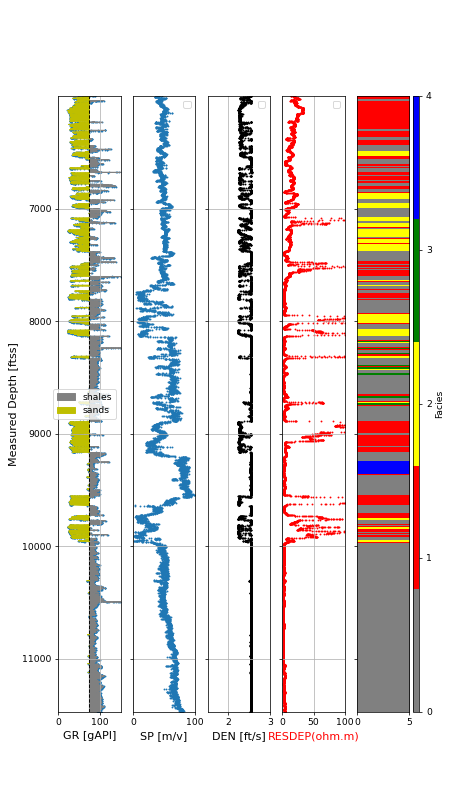

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [75]:
import matplotlib.colors as colors

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom2_data = data[data['Well_name'] == 'OBOM-2']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom2_data['GR'], obom2_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom2_data['Depth'], obom2_data['GR'], 75,
                 where=obom2_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom2_data['Depth'], obom2_data['GR'], 75,
                 where=obom2_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom2_data['SP'], obom2_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom2_data['DEN'], obom2_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom2_data['RESDEP'], obom2_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom2_data['Facies_color'] = obom2_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom2_data['Facies'], obom2_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom2_data['Depth']), min(obom2_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


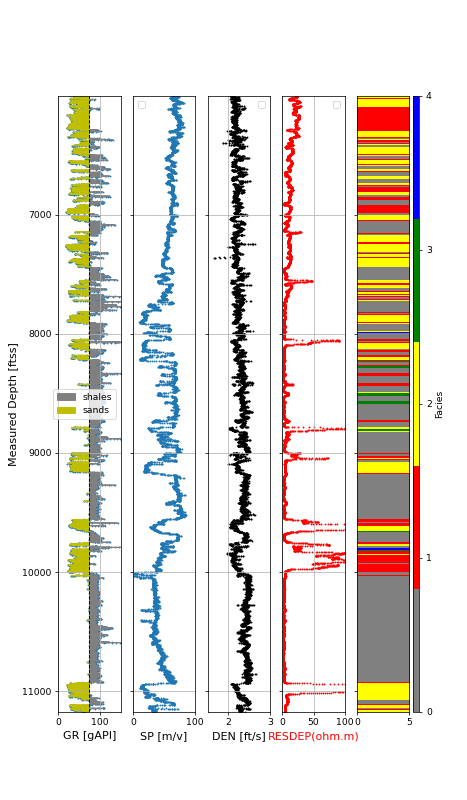

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [76]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom3_data = data[data['Well_name'] == 'OBOM-3']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom3_data['GR'], obom3_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom3_data['Depth'], obom3_data['GR'], 75,
                 where=obom3_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom3_data['Depth'], obom3_data['GR'], 75,
                 where=obom3_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom3_data['SP'], obom3_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom3_data['DEN'], obom3_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom3_data['RESDEP'], obom3_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom3_data['Facies_color'] = obom3_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom3_data['Facies'], obom3_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom3_data['Depth']), min(obom3_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


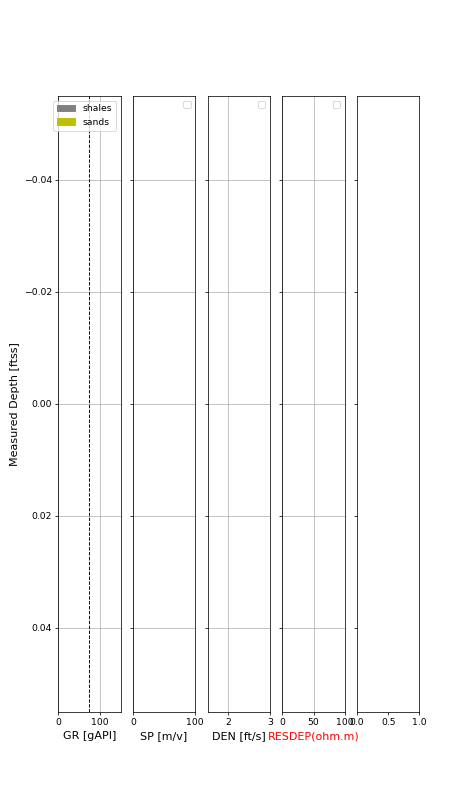

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: max() arg is an empty sequence

In [77]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom4_data = data[data['Well_name'] == 'OBOM-4']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom4_data['GR'], obom4_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom4_data['Depth'], obom4_data['GR'], 75,
                 where=obom4_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom4_data['Depth'], obom4_data['GR'], 75,
                 where=obom4_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom4_data['SP'], obom4_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom4_data['DEN'], obom4_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom4_data['RESDEP'], obom4_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom4_data['Facies_color'] = obom4_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom4_data['Facies'], obom4_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom4_data['Depth']), min(obom4_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


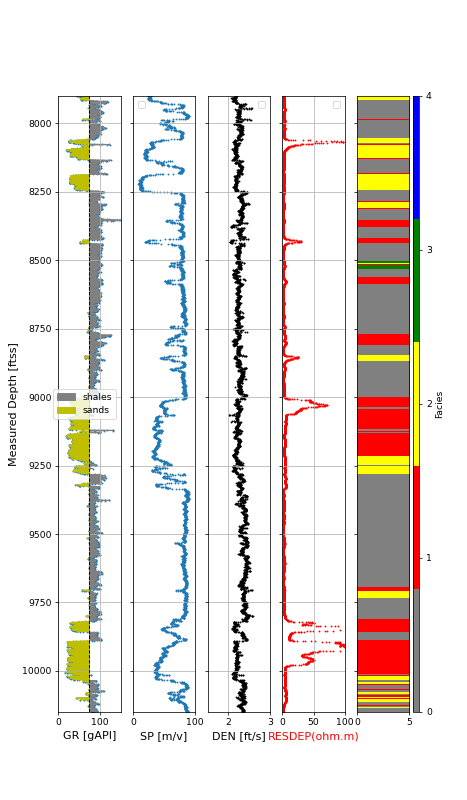

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [78]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom5_data = data[data['Well_name'] == 'OBOM-5']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom5_data['GR'], obom5_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom5_data['Depth'], obom5_data['GR'], 75,
                 where=obom5_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom5_data['Depth'], obom5_data['GR'], 75,
                 where=obom5_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom5_data['SP'], obom5_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom5_data['DEN'], obom5_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom5_data['RESDEP'], obom5_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom5_data['Facies_color'] = obom5_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom5_data['Facies'], obom5_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom5_data['Depth']), min(obom5_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


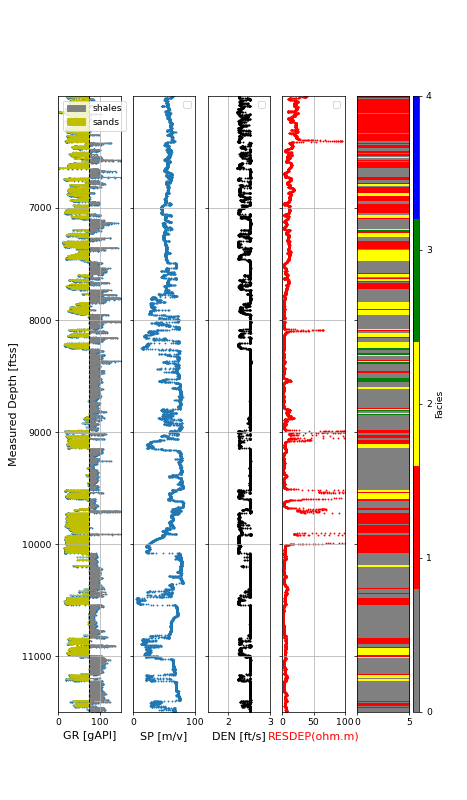

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [79]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom6_data = data[data['Well_name'] == 'OBOM-6']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom6_data['GR'], obom6_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom6_data['Depth'], obom6_data['GR'], 75,
                 where=obom6_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom6_data['Depth'], obom6_data['GR'], 75,
                 where=obom6_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom6_data['SP'], obom6_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom6_data['DEN'], obom6_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom6_data['RESDEP'], obom6_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom6_data['Facies_color'] = obom6_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom6_data['Facies'], obom6_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom6_data['Depth']), min(obom6_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


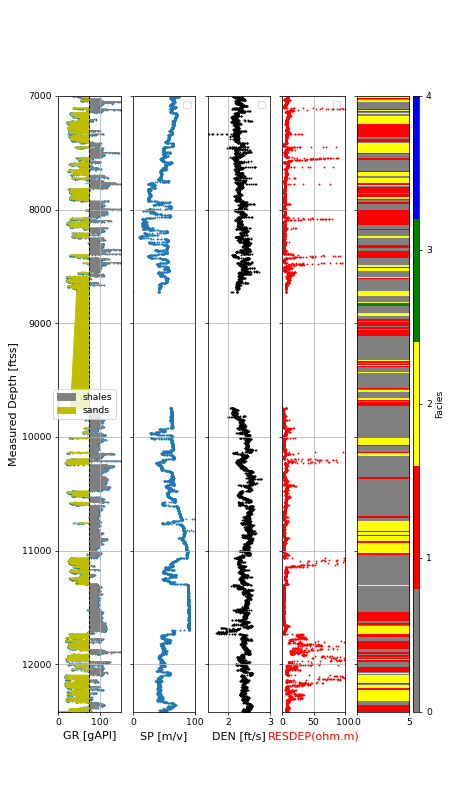

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [80]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom7_data = data[data['Well_name'] == 'OBOM-7']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom7_data['GR'], obom7_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom7_data['Depth'], obom7_data['GR'], 75,
                 where=obom7_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom7_data['Depth'], obom7_data['GR'], 75,
                 where=obom7_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom7_data['SP'], obom7_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom7_data['DEN'], obom7_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom7_data['RESDEP'], obom7_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom7_data['Facies_color'] = obom7_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom7_data['Facies'], obom7_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom7_data['Depth']), min(obom7_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


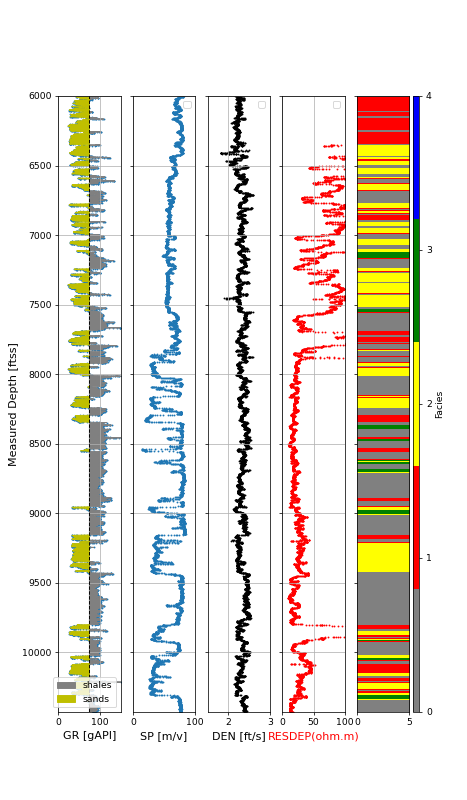

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [81]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom8_data = data[data['Well_name'] == 'OBOM-8']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom8_data['GR'], obom8_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom8_data['Depth'], obom8_data['GR'], 75,
                 where=obom8_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom8_data['Depth'], obom8_data['GR'], 75,
                 where=obom8_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom8_data['SP'], obom8_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom8_data['DEN'], obom8_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom8_data['RESDEP'], obom8_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom8_data['Facies_color'] = obom8_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom8_data['Facies'], obom8_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom8_data['Depth']), min(obom8_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

In [82]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom9_data = data[data['Well_name'] == 'OBOM-9']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom9_data['GR'], obom9_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom9_data['Depth'], obom9_data['GR'], 75,
                 where=obom9_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom9_data['Depth'], obom9_data['GR'], 75,
                 where=obom9_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom9_data['SP'], obom9_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom9_data['DEN'], obom9_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom9_data['RESDEP'], obom9_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom9_data['Facies_color'] = obom9_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom9_data['Facies'], obom9_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom9_data['Depth']), min(obom9_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


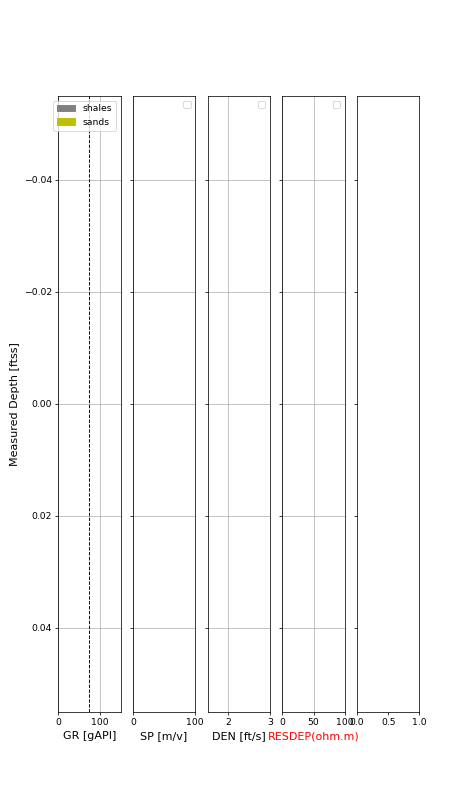

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: max() arg is an empty sequence

In [83]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom10_data = data[data['Well_name'] == 'OBOM-10']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom10_data['GR'], obom10_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom10_data['Depth'], obom10_data['GR'], 75,
                 where=obom10_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom10_data['Depth'], obom10_data['GR'], 75,
                 where=obom10_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom10_data['SP'], obom10_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom10_data['DEN'], obom10_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom10_data['RESDEP'], obom10_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom10_data['Facies_color'] = obom10_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom10_data['Facies'], obom10_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom10_data['Depth']), min(obom10_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

In [ ]:
obom11_data

<IPython.core.display.Javascript object>


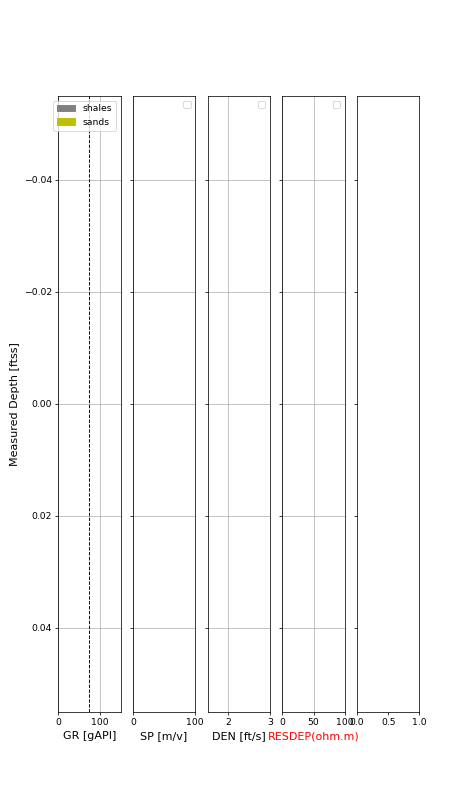

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: max() arg is an empty sequence

In [84]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom11_data = data[data['Well_name'] == 'OBOM-11']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom11_data['GR'], obom11_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom11_data['Depth'], obom11_data['GR'], 75,
                 where=obom11_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom11_data['Depth'], obom11_data['GR'], 75,
                 where=obom11_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom11_data['SP'], obom11_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom11_data['DEN'], obom11_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom11_data['RESDEP'], obom11_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom11_data['Facies_color'] = obom11_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom11_data['Facies'], obom11_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom11_data['Depth']), min(obom11_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

In [66]:
obom13_data = data[data['Well_name'] == 'OBOM-13']
obom13_data

Empty DataFrame
Columns: [Depth, GR, SP, DEN, RESDEP, Facies, Well_name, POR, lithofacies, Facies_Labels, Reservoir_Status]
Index: []

<IPython.core.display.Javascript object>


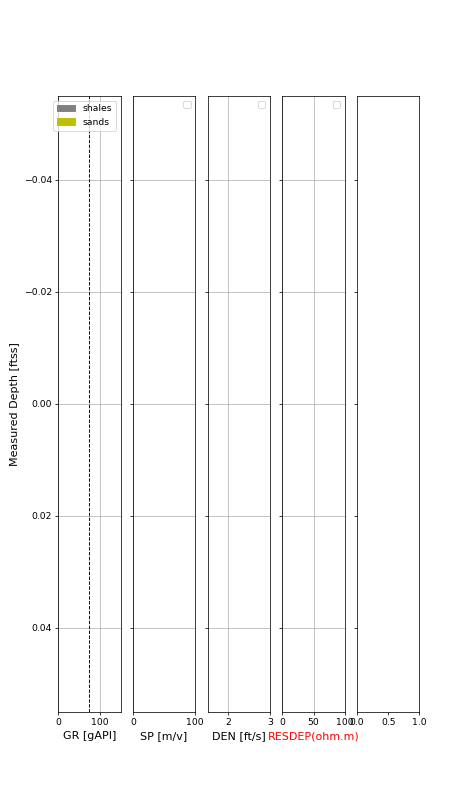

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: max() arg is an empty sequence

In [85]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom12_data = data[data['Well_name'] == 'OBOM-12']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom12_data['GR'], obom12_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom12_data['Depth'], obom12_data['GR'], 75,
                 where=obom12_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom12_data['Depth'], obom12_data['GR'], 75,
                 where=obom12_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom12_data['SP'], obom12_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom12_data['DEN'], obom12_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom12_data['RESDEP'], obom12_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom12_data['Facies_color'] = obom12_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom12_data['Facies'], obom12_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom12_data['Depth']), min(obom12_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

In [86]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom13_data = data[data['Well_name'] == 'OBOM-13']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom13_data['GR'], obom13_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom13_data['Depth'], obom13_data['GR'], 75,
                 where=obom13_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom13_data['Depth'], obom13_data['GR'], 75,
                 where=obom13_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom13_data['SP'], obom13_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom13_data['DEN'], obom13_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom13_data['RESDEP'], obom13_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom13_data['Facies_color'] = obom13_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom13_data['Facies'], obom13_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom13_data['Depth']), min(obom13_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


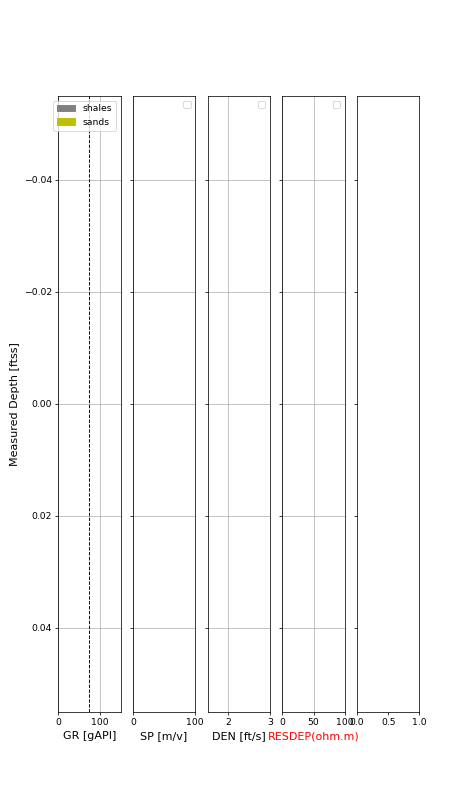

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: max() arg is an empty sequence

In [87]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom7_data = data[data['Well_name'] == 'OBOM-7']
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(7,12), sharex=False, sharey= True)

# Plot GR
ax = axs[0]
ax.scatter(obom7_data['GR'], obom7_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom7_data['Depth'], obom7_data['GR'], 75,
                 where=obom14_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom14_data['Depth'], obom14_data['GR'], 75,
                 where=obom14_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom14_data['SP'], obom14_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP [m/v]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom14_data['DEN'], obom14_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom14_data['RESDEP'], obom14_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP(ohm.m)', color = 'r', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom14_data['Facies_color'] = obom14_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom14_data['Facies'], obom14_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom14_data['Depth']), min(obom14_data['Depth'])], cmap=cmap_facies)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('Facies')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

In [60]:
obom14_data

NameError: name 'obom14_data' is not defined

In [61]:
display(obom6_data)

NameError: name 'obom6_data' is not defined

**2. Prepare data for modeling and blind test well**

The wells not containing facies as gotten from the well plots are dropped which are well This affected wells Obom-9, Obom-10, Obom-11, Obom-12, and Obom-14. The well Obom-7 is taken as blind test well and other wells for modeling.

In [62]:
wells_to_drop = ['Obom-9', 'Obom-10', 'Obom-11', 'Obom-12', 'Obom-14']
data_filtered = data[~data['Well_name'].isin(wells_to_drop)]

In [63]:
# Save the DataFrame to a CSV file
data_filtered.to_csv('data_filtered.csv', index=False) 

In [64]:
data_filtered.isnull().sum()

Depth                   0
GR                      0
SP                      0
DEN                     0
RESDEP                  0
Facies                  0
Well_name               0
POR                 57232
lithofacies             0
Facies_Labels           0
Reservoir_Status        0
dtype: int64

In [65]:
data_filtered['Well_name'].value_counts()

OBOM-6     10981
OBOM-1     10939
OBOM-2     10927
OBOM-3     10328
OBOM-8      8841
OBOM-4      8781
OBOM-7      8753
OBOM-5      4489
OBOM-13     4390
OBOM-9      1317
Name: Well_name, dtype: int64

In [66]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Assuming 'data' is your DataFrame
# Specify the columns you want to transform
columns_to_transform = ['GR', 'RESDEP', 'DEN', 'SP']

# Create a copy of the original DataFrame to avoid modifying the original data
data_transformed = data_filtered.copy()

# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit the transformer on the specified columns and transform the data
data_transformed[columns_to_transform] = power_transformer.fit_transform(data_filtered[columns_to_transform])

# Display the transformed data
print(data_transformed.head())

       Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000  6500.5 -1.164443  1.004879 -0.886928  1.162638       2    OBOM-1  NaN   
1001  6501.0 -1.001282  0.996626 -0.708210  1.151833       2    OBOM-1  NaN   
1002  6501.5 -0.944376  0.986670 -0.635328  1.134824       2    OBOM-1  NaN   
1003  6502.0 -0.798752  0.986687 -0.408598  1.116937       2    OBOM-1  NaN   
1004  6502.5 -0.642617  0.957132 -0.136141  1.093910       2    OBOM-1  NaN   

     lithofacies Facies_Labels Reservoir_Status  
1000         USF           USF        Reservoir  
1001         USF           USF        Reservoir  
1002         USF           USF        Reservoir  
1003         USF           USF        Reservoir  
1004         USF           USF        Reservoir  


In [67]:
data_transformed.head()

Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000  6500.5 -1.164443  1.004879 -0.886928  1.162638       2    OBOM-1  NaN   
1001  6501.0 -1.001282  0.996626 -0.708210  1.151833       2    OBOM-1  NaN   
1002  6501.5 -0.944376  0.986670 -0.635328  1.134824       2    OBOM-1  NaN   
1003  6502.0 -0.798752  0.986687 -0.408598  1.116937       2    OBOM-1  NaN   
1004  6502.5 -0.642617  0.957132 -0.136141  1.093910       2    OBOM-1  NaN   

     lithofacies Facies_Labels Reservoir_Status  
1000         USF           USF        Reservoir  
1001         USF           USF        Reservoir  
1002         USF           USF        Reservoir  
1003         USF           USF        Reservoir  
1004         USF           USF        Reservoir

In [68]:
data_transformed['Facies_Labels'].value_counts()

SH          42003
USF         18117
Channels    16535
LSF          2201
HT            890
Name: Facies_Labels, dtype: int64

In [69]:
data_filtered.isnull().sum()

Depth                   0
GR                      0
SP                      0
DEN                     0
RESDEP                  0
Facies                  0
Well_name               0
POR                 57232
lithofacies             0
Facies_Labels           0
Reservoir_Status        0
dtype: int64

In [70]:
unique_facies = data_transformed['Facies_Labels'].unique()
unique_facies

array(['USF', 'SH', 'Channels', 'LSF', 'HT'], dtype=object)

<IPython.core.display.Javascript object>


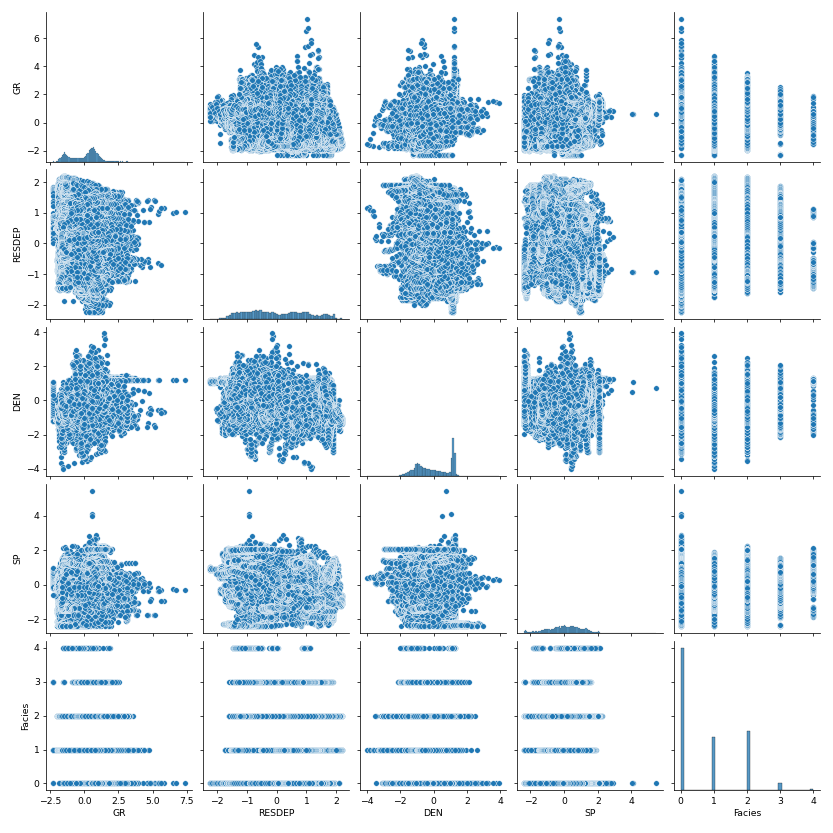

In [98]:

# Assuming 'data' is your DataFrame containing lithofacies, GR, RESDEP, DEN, SP
vas_of_interest1 = ['GR', 'RESDEP', 'DEN', 'SP','Facies']

# Subset the DataFrame to include only the variables of interest
subset_data1 = data_transformed[vas_of_interest1]

# Use pairplot to create a plot matrix
sns.pairplot(subset_data1, palette=facies_colors)
plt.suptitle('Plot Matrix of Lithofacies and Well Log Variables', y=1.02)
plt.show()

<IPython.core.display.Javascript object>


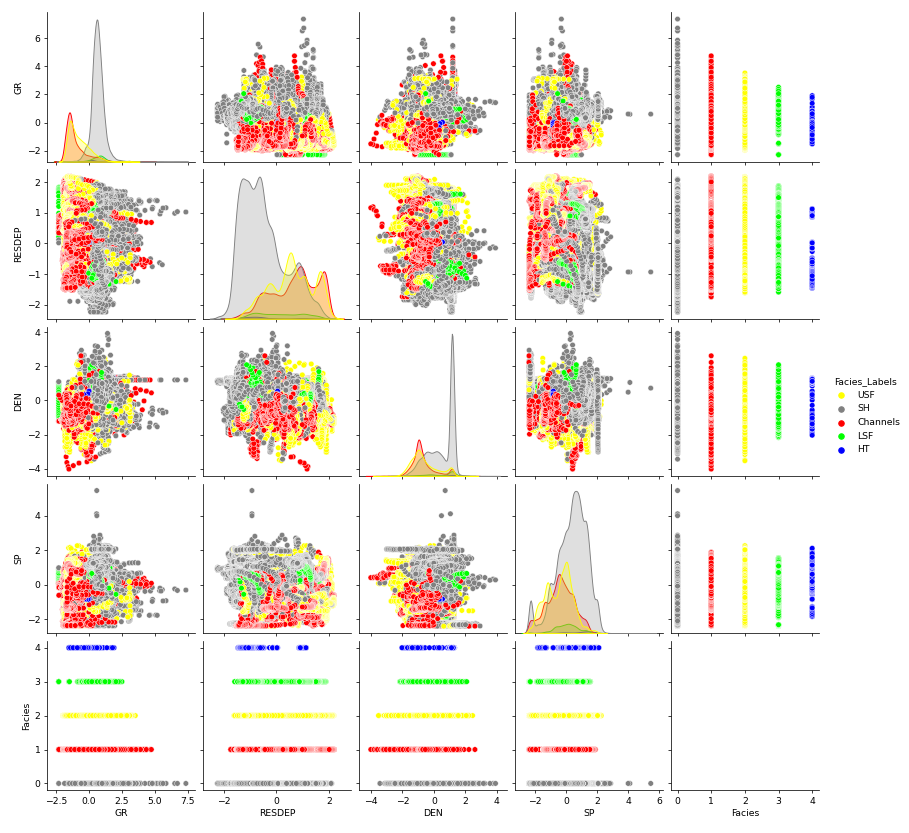

In [99]:
# Update facies_colors based on the unique values in the transformed 'Facies_Labels' column
facies_colors_transformed = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Assuming 'data_transformed' is your DataFrame containing the transformed data
vars_of_interest_transformed = ['Facies_Labels', 'GR', 'RESDEP', 'DEN', 'SP', 'Facies']
subset_data_transformed = data_transformed[vars_of_interest_transformed]

# Use pairplot to create a plot matrix for the transformed data
sns.pairplot(subset_data_transformed, hue='Facies_Labels', palette=facies_colors_transformed)
plt.suptitle('Plot Matrix of Lithofacies and Transformed Well Log Variables', y=1.02)
plt.show()

<IPython.core.display.Javascript object>


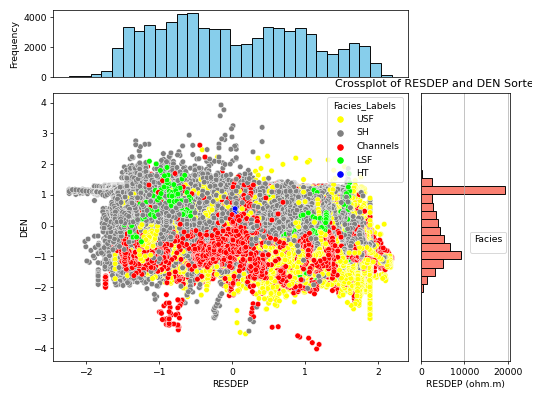

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'Facies' with the actual column name containing facies information

plt.figure(figsize=(8, 6))

facies_colors = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Create 2x2 grid for the main plot and histograms
gs = plt.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])

# Scatter plot with different colors for each facies
ax_main = plt.subplot(gs[1, 0])
sns.scatterplot(x='RESDEP', y='DEN', hue='Facies_Labels', data=data_transformed, palette=facies_colors, ax=ax_main)

# Histogram for RESDEP along the top
ax_top = plt.subplot(gs[0, 0], sharex=ax_main)
ax_top.hist(data_transformed['RESDEP'], bins=30, color='skyblue', edgecolor='black')
ax_top.set(ylabel='Frequency')
ax_top.get_xaxis().set_visible(False)  # Hide x-axis labels

# Histogram for DEN along the right
ax_right = plt.subplot(gs[1, 1], sharey=ax_main)
ax_right.hist(data_transformed['DEN'], bins=30, color='salmon', edgecolor='black', orientation='horizontal')
ax_right.set(xlabel='Frequency')
ax_right.get_yaxis().set_visible(False)  # Hide y-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()

plt.xlabel('RESDEP (ohm.m)')
plt.ylabel('DEN (g/m³)')
plt.title('Crossplot of RESDEP and DEN Sorted by Facies')

plt.legend(title='Facies', bbox_to_anchor=(0.5, 0.5), loc='upper left')

plt.grid(True)
plt.show()

In [144]:
data

Depth          GR         SP     DEN     RESDEP  Facies Well_name  \
1000    6500.5   40.834099  71.804199  2.2734  27.702000       2    OBOM-1   
1001    6501.0   45.631100  71.661797  2.3010  27.178900       2    OBOM-1   
1002    6501.5   47.282700  71.489899  2.3119  26.382900       2    OBOM-1   
1003    6502.0   51.463501  71.490196  2.3446  25.580299       2    OBOM-1   
1004    6502.5   55.879501  70.979301  2.3817  24.596100       2    OBOM-1   
...        ...         ...        ...     ...        ...     ...       ...   
258066  8798.0   91.050003  54.827770  2.3881   9.135000       0   OBOM-13   
258067  8798.5   92.940002  55.007641  2.4652   9.322400       0   OBOM-13   
258068  8799.0   95.302498  55.187481  2.5110   9.607500       0   OBOM-13   
258069  8799.5  100.500000  53.612499  2.5111   9.670500       0   OBOM-13   
258070  8800.0  101.208702  53.447491  2.5111   9.607500       0   OBOM-13   

        POR lithofacies Facies_Labels Reservoir_Status  
1000    NaN         USF           USF        Reservoir  
1001    NaN         USF           USF        Reservoir  
1002    NaN         USF           USF        Reservoir  
1003    NaN         USF           USF        Reservoir  
1004    NaN         USF           USF        Reservoir  
...     ...         ...           ...              ...  
258066  NaN       Shale            SH    Non-Reservoir  
258067  NaN       Shale            SH    Non-Reservoir  
258068  NaN       Shale            SH    Non-Reservoir  
258069  NaN       Shale            SH    Non-Reservoir  
258070  NaN       Shale            SH    Non-Reservoir  

[70965 rows x 11 columns]

In [127]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Assuming 'features' is a list of the columns you want to scale
features = ['GR', 'RESDEP', 'DEN', 'SP']

data_scaled = data_filtered.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected features and transform the data
data_scaled = scaler.fit_transform(data_filtered[features])

# Create a new DataFrame with the scaled features
data_scaled_df = pd.DataFrame(data_scaled, columns=features)

# Now, 'data_scaled_df' contains your data with the selected features standardized

In [128]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Specify the columns you want to transform
columns_to_transform = ['GR', 'RESDEP', 'DEN', 'SP']

# Create a copy of the original DataFrame to avoid modifying the original data
data_scaled = data_filtered.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform the data
data_scaled[columns_to_transform] = scaler.fit_transform(data_filtered[columns_to_transform])

# Display the scaled data
print(data_scaled.head())

       Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000  6500.5 -1.157313  0.971994 -0.830474  0.173817       2    OBOM-1  NaN   
1001  6501.0 -0.981776  0.964709 -0.625346  0.162189       2    OBOM-1  NaN   
1002  6501.5 -0.921339  0.955915 -0.544337  0.144493       2    OBOM-1  NaN   
1003  6502.0 -0.768350  0.955930 -0.301305  0.126651       2    OBOM-1  NaN   
1004  6502.5 -0.606755  0.929793 -0.025571  0.104771       2    OBOM-1  NaN   

     lithofacies Facies_Labels Reservoir_Status  
1000         USF           USF        Reservoir  
1001         USF           USF        Reservoir  
1002         USF           USF        Reservoir  
1003         USF           USF        Reservoir  
1004         USF           USF        Reservoir  


In [129]:
data_scaled

Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000    6500.5 -1.157313  0.971994 -0.830474  0.173817       2    OBOM-1  NaN   
1001    6501.0 -0.981776  0.964709 -0.625346  0.162189       2    OBOM-1  NaN   
1002    6501.5 -0.921339  0.955915 -0.544337  0.144493       2    OBOM-1  NaN   
1003    6502.0 -0.768350  0.955930 -0.301305  0.126651       2    OBOM-1  NaN   
1004    6502.5 -0.606755  0.929793 -0.025571  0.104771       2    OBOM-1  NaN   
...        ...       ...       ...       ...       ...     ...       ...  ...   
258066  8798.0  0.680245  0.103493  0.021994 -0.238938       0   OBOM-13  NaN   
258067  8798.5  0.749406  0.112695  0.595015 -0.234772       0   OBOM-13  NaN   
258068  8799.0  0.835857  0.121896  0.935408 -0.228434       0   OBOM-13  NaN   
258069  8799.5  1.026050  0.041321  0.936152 -0.227033       0   OBOM-13  NaN   
258070  8800.0  1.051983  0.032879  0.936152 -0.228434       0   OBOM-13  NaN   

       lithofacies Facies_Labels Reservoir_Status  
1000           USF           USF        Reservoir  
1001           USF           USF        Reservoir  
1002           USF           USF        Reservoir  
1003           USF           USF        Reservoir  
1004           USF           USF        Reservoir  
...            ...           ...              ...  
258066       Shale            SH    Non-Reservoir  
258067       Shale            SH    Non-Reservoir  
258068       Shale            SH    Non-Reservoir  
258069       Shale            SH    Non-Reservoir  
258070       Shale            SH    Non-Reservoir  

[79746 rows x 11 columns]

<IPython.core.display.Javascript object>


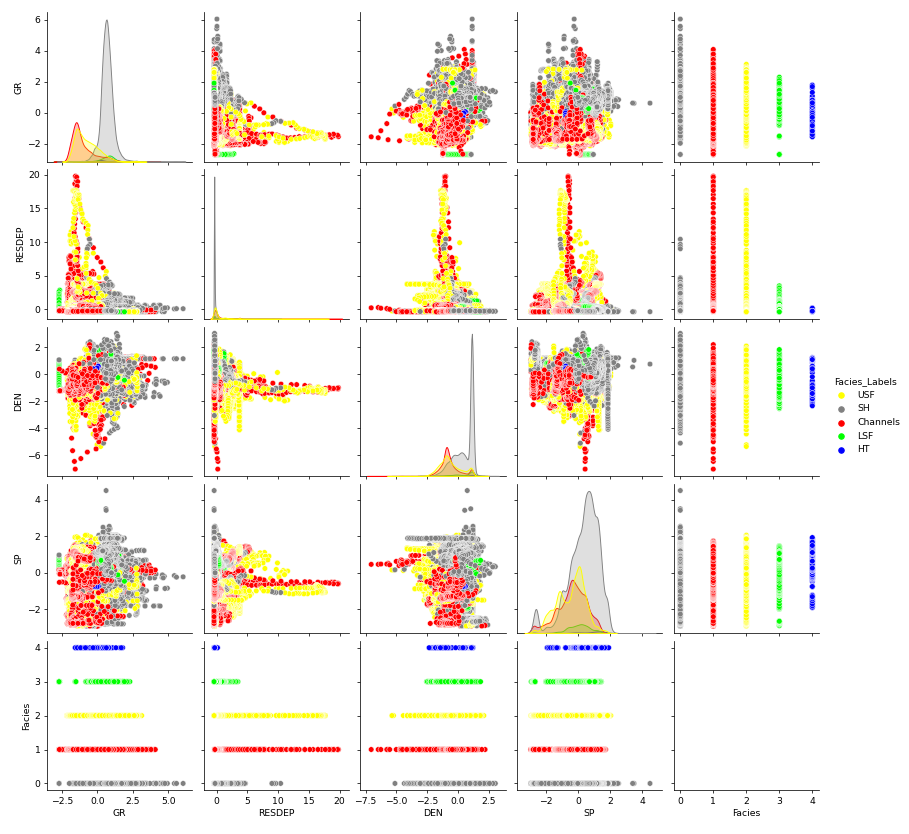

In [103]:
# Update facies_colors based on the unique values in the transformed 'Facies_Labels' column
facies_colors_scaled = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Assuming 'data_transformed' is your DataFrame containing the transformed data
vars_of_interest_scaled = ['Facies_Labels', 'GR', 'RESDEP', 'DEN', 'SP', 'Facies']
subset_data_scaled = data_scaled[vars_of_interest_scaled]

# Use pairplot to create a plot matrix for the transformed scaled data
sns.pairplot(subset_data_scaled, hue='Facies_Labels', palette=facies_colors_scaled)
plt.suptitle('Plot Matrix of Lithofacies and Transformed Well Log Variables', y=1.02)
plt.show()

In [130]:
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your DataFrame
# Assuming 'features' is a list of the columns you want to scale
features = ['GR', 'RESDEP', 'DEN', 'SP']

data_rob_scaled = data_filtered.copy()

# Initialize the RobustScaler
Rob_scaler = RobustScaler()

# Fit the scaler on the selected features and transform the data
data_rob_scaled[features] = Rob_scaler.fit_transform(data_filtered[features])

# Now, 'data_scaled' contains your data with the selected features scaled using RobustScaler

In [131]:
data_rob_scaled

Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000    6500.5 -0.871163  0.642000 -0.469252  1.666567       2    OBOM-1  NaN   
1001    6501.0 -0.767507  0.636498 -0.362304  1.627754       2    OBOM-1  NaN   
1002    6501.5 -0.731819  0.629857 -0.320068  1.568693       2    OBOM-1  NaN   
1003    6502.0 -0.641478  0.629868 -0.193358  1.509142       2    OBOM-1  NaN   
1004    6502.5 -0.546055  0.610129 -0.049599  1.436117       2    OBOM-1  NaN   
...        ...       ...       ...       ...       ...     ...       ...  ...   
258066  8798.0  0.213923 -0.013895 -0.024800  0.288940       0   OBOM-13  NaN   
258067  8798.5  0.254763 -0.006945  0.273956  0.302845       0   OBOM-13  NaN   
258068  8799.0  0.305813  0.000003  0.451427  0.323999       0   OBOM-13  NaN   
258069  8799.5  0.418123 -0.060847  0.451815  0.328673       0   OBOM-13  NaN   
258070  8800.0  0.433437 -0.067222  0.451815  0.323999       0   OBOM-13  NaN   

       lithofacies Facies_Labels Reservoir_Status  
1000           USF           USF        Reservoir  
1001           USF           USF        Reservoir  
1002           USF           USF        Reservoir  
1003           USF           USF        Reservoir  
1004           USF           USF        Reservoir  
...            ...           ...              ...  
258066       Shale            SH    Non-Reservoir  
258067       Shale            SH    Non-Reservoir  
258068       Shale            SH    Non-Reservoir  
258069       Shale            SH    Non-Reservoir  
258070       Shale            SH    Non-Reservoir  

[79746 rows x 11 columns]

<IPython.core.display.Javascript object>


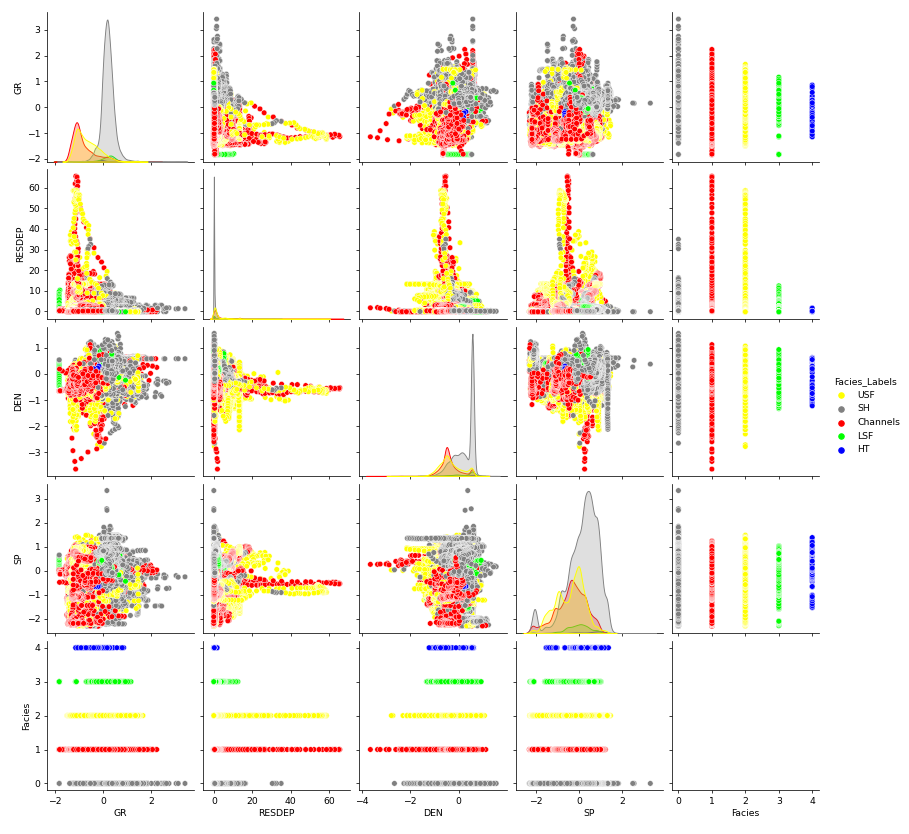

In [106]:
# Update facies_colors based on the unique values in the transformed 'Facies_Labels' column
facies_colors_scaled = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Assuming 'data_transformed' is your DataFrame containing the transformed data
vars_of_interest_scaled = ['Facies_Labels', 'GR', 'RESDEP', 'DEN', 'SP', 'Facies']
subset_data_rob_scaled = data_rob_scaled[vars_of_interest_scaled]

# Use pairplot to create a plot matrix for the transformed scaled data
sns.pairplot(subset_data_rob_scaled, hue='Facies_Labels', palette=facies_colors_scaled)
plt.suptitle('Plot Matrix of Lithofacies and Transformed Well Log Variables', y=1.02)
plt.show()

In [71]:
from sklearn.preprocessing import QuantileTransformer

# Assuming 'data' is your DataFrame
# Specify the columns you want to transform
columns_to_transform = ['GR', 'RESDEP', 'DEN', 'SP']

# Create a copy of the original DataFrame to avoid modifying the original data
data_transformed_quantile = data_filtered.copy()

# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='uniform')

# Fit the transformer on the specified columns and transform the data
data_transformed_quantile[columns_to_transform] = quantile_transformer.fit_transform(data_filtered[columns_to_transform])

# Display the transformed data
print(data_transformed_quantile.head())

       Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000  6500.5  0.203832  0.838512  0.269019  0.854783       2    OBOM-1  NaN   
1001  6501.0  0.241219  0.835477  0.333959  0.852520       2    OBOM-1  NaN   
1002  6501.5  0.251912  0.832661  0.356718  0.848144       2    OBOM-1  NaN   
1003  6502.0  0.276989  0.832663  0.418828  0.843290       2    OBOM-1  NaN   
1004  6502.5  0.302223  0.825958  0.480615  0.835085       2    OBOM-1  NaN   

     lithofacies Facies_Labels Reservoir_Status  
1000         USF           USF        Reservoir  
1001         USF           USF        Reservoir  
1002         USF           USF        Reservoir  
1003         USF           USF        Reservoir  
1004         USF           USF        Reservoir  


In [72]:
data_transformed_quantile

Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000    6500.5  0.203832  0.838512  0.269019  0.854783       2    OBOM-1  NaN   
1001    6501.0  0.241219  0.835477  0.333959  0.852520       2    OBOM-1  NaN   
1002    6501.5  0.251912  0.832661  0.356718  0.848144       2    OBOM-1  NaN   
1003    6502.0  0.276989  0.832663  0.418828  0.843290       2    OBOM-1  NaN   
1004    6502.5  0.302223  0.825958  0.480615  0.835085       2    OBOM-1  NaN   
...        ...       ...       ...       ...       ...     ...       ...  ...   
258066  8798.0  0.702202  0.492803  0.490338  0.616873       0   OBOM-13  NaN   
258067  8798.5  0.743744  0.496550  0.603241  0.621631       0   OBOM-13  NaN   
258068  8799.0  0.794795  0.501001  0.658158  0.627975       0   OBOM-13  NaN   
258069  8799.5  0.885886  0.469970  0.658325  0.629416       0   OBOM-13  NaN   
258070  8800.0  0.894902  0.466465  0.658325  0.627975       0   OBOM-13  NaN   

       lithofacies Facies_Labels Reservoir_Status  
1000           USF           USF        Reservoir  
1001           USF           USF        Reservoir  
1002           USF           USF        Reservoir  
1003           USF           USF        Reservoir  
1004           USF           USF        Reservoir  
...            ...           ...              ...  
258066       Shale            SH    Non-Reservoir  
258067       Shale            SH    Non-Reservoir  
258068       Shale            SH    Non-Reservoir  
258069       Shale            SH    Non-Reservoir  
258070       Shale            SH    Non-Reservoir  

[79746 rows x 11 columns]

<IPython.core.display.Javascript object>


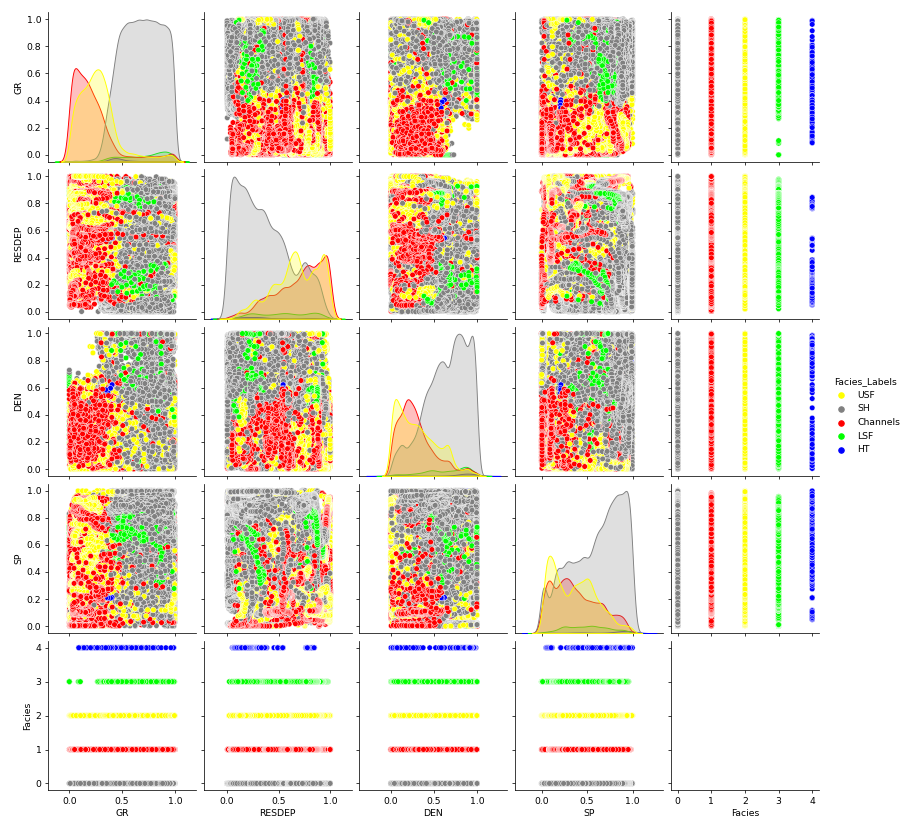

In [109]:
#Update facies_colors based on the unique values in the transformed 'Facies_Labels' column
facies_colors_scaled = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Assuming 'data_transformed' is your DataFrame containing the transformed data
vars_of_interest_scaled = ['Facies_Labels', 'GR', 'RESDEP', 'DEN', 'SP', 'Facies']
subset_data_transformed_quantile = data_transformed_quantile[vars_of_interest_scaled]

# Use pairplot to create a plot matrix for the transformed scaled data
sns.pairplot(subset_data_transformed_quantile, hue='Facies_Labels', palette=facies_colors_scaled)
plt.suptitle('Plot Matrix of Lithofacies and Transformed Well Log Variables', y=1.02)
plt.show()

<IPython.core.display.Javascript object>


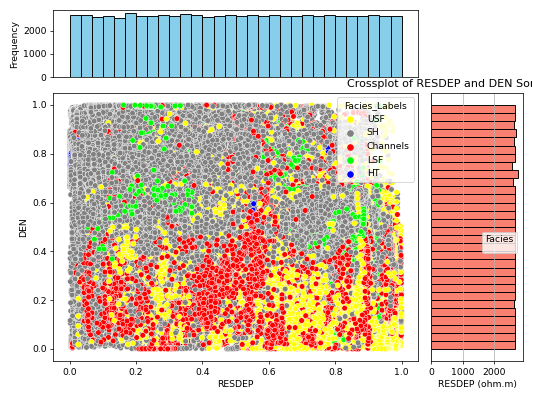

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'Facies' with the actual column name containing facies information

plt.figure(figsize=(8, 6))

facies_colors = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Create 2x2 grid for the main plot and histograms
gs = plt.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])

# Scatter plot with different colors for each facies
ax_main = plt.subplot(gs[1, 0])
sns.scatterplot(x='RESDEP', y='DEN', hue='Facies_Labels', data=data_transformed_quantile, palette=facies_colors, ax=ax_main)

# Histogram for RESDEP along the top
ax_top = plt.subplot(gs[0, 0], sharex=ax_main)
ax_top.hist(data_transformed_quantile['RESDEP'], bins=30, color='skyblue', edgecolor='black')
ax_top.set(ylabel='Frequency')
ax_top.get_xaxis().set_visible(False)  # Hide x-axis labels

# Histogram for DEN along the right
ax_right = plt.subplot(gs[1, 1], sharey=ax_main)
ax_right.hist(data_transformed_quantile['DEN'], bins=30, color='salmon', edgecolor='black', orientation='horizontal')
ax_right.set(xlabel='Frequency')
ax_right.get_yaxis().set_visible(False)  # Hide y-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()

plt.xlabel('RESDEP (ohm.m)')
plt.ylabel('DEN (g/m³)')
plt.title('Crossplot of RESDEP and DEN Sorted by Facies')

plt.legend(title='Facies', bbox_to_anchor=(0.5, 0.5), loc='upper left')

plt.grid(True)
plt.show()

In [73]:
from sklearn.preprocessing import QuantileTransformer

# Assuming 'data' is your DataFrame
# Specify the columns you want to transform
columns_to_transform = ['GR', 'RESDEP', 'DEN', 'SP']

# Create a copy of the original DataFrame to avoid modifying the original data
data_transformed_quantile_D = data_filtered.copy()

# Initialize the QuantileTransformer with a Gaussian distribution
quantile_transformer_D = QuantileTransformer(output_distribution='normal')

# Fit the transformer on the specified columns and transform the data
data_transformed_quantile_D[columns_to_transform] = quantile_transformer_D.fit_transform(data_filtered[columns_to_transform])

# Display the transformed data with quantile transformation and Gaussian distribution
print(data_transformed_quantile_D.head())

       Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000  6500.5 -0.828011  0.988361 -0.615782  1.057172       2    OBOM-1  NaN   
1001  6501.0 -0.702388  0.976037 -0.429008  1.047301       2    OBOM-1  NaN   
1002  6501.5 -0.668486  0.964733 -0.367245  1.028504       2    OBOM-1  NaN   
1003  6502.0 -0.591811  0.964743 -0.204893  1.008073       2    OBOM-1  NaN   
1004  6502.5 -0.518018  0.938312 -0.048610  0.974457       2    OBOM-1  NaN   

     lithofacies Facies_Labels Reservoir_Status  
1000         USF           USF        Reservoir  
1001         USF           USF        Reservoir  
1002         USF           USF        Reservoir  
1003         USF           USF        Reservoir  
1004         USF           USF        Reservoir  


In [74]:
data_transformed_quantile_D

Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
1000    6500.5 -0.828011  0.988361 -0.615782  1.057172       2    OBOM-1  NaN   
1001    6501.0 -0.702388  0.976037 -0.429008  1.047301       2    OBOM-1  NaN   
1002    6501.5 -0.668486  0.964733 -0.367245  1.028504       2    OBOM-1  NaN   
1003    6502.0 -0.591811  0.964743 -0.204893  1.008073       2    OBOM-1  NaN   
1004    6502.5 -0.518018  0.938312 -0.048610  0.974457       2    OBOM-1  NaN   
...        ...       ...       ...       ...       ...     ...       ...  ...   
258066  8798.0  0.530745 -0.018040 -0.024220  0.297279       0   OBOM-13  NaN   
258067  8798.5  0.654930 -0.008648  0.261745  0.309767       0   OBOM-13  NaN   
258068  8799.0  0.823172  0.002509  0.407441  0.326496       0   OBOM-13  NaN   
258069  8799.5  1.204935 -0.075345  0.407896  0.330306       0   OBOM-13  NaN   
258070  8800.0  1.253028 -0.084159  0.407896  0.326496       0   OBOM-13  NaN   

       lithofacies Facies_Labels Reservoir_Status  
1000           USF           USF        Reservoir  
1001           USF           USF        Reservoir  
1002           USF           USF        Reservoir  
1003           USF           USF        Reservoir  
1004           USF           USF        Reservoir  
...            ...           ...              ...  
258066       Shale            SH    Non-Reservoir  
258067       Shale            SH    Non-Reservoir  
258068       Shale            SH    Non-Reservoir  
258069       Shale            SH    Non-Reservoir  
258070       Shale            SH    Non-Reservoir  

[79746 rows x 11 columns]

In [75]:
data_transformed_quantile_D['Facies_Labels'].value_counts()

SH          42003
USF         18117
Channels    16535
LSF          2201
HT            890
Name: Facies_Labels, dtype: int64

In [76]:
# Now we extract just the feature variables we need to perform the classification. 
# The predictor variables are the five wireline values and two geologic constraining variables. 
# We also get a vector of the facies labels that correspond to each feature vector.
correct_facies_labels = data_transformed_quantile_D['Facies'].values

feature_vectors = data_transformed_quantile_D.drop(['Depth', 'Well_name','Facies','Facies_Labels', 'POR', 'lithofacies', 'Reservoir_Status'], axis=1)
feature_vectors.describe()

GR            SP           DEN        RESDEP
count  79746.000000  79746.000000  79746.000000  79746.000000
mean      -0.000303     -0.000144     -0.000038     -0.000683
std        0.999762      0.999130      0.998772      1.003170
min       -5.199338     -5.199338     -5.199338     -5.199338
25%       -0.674615     -0.674495     -0.674443     -0.675280
50%       -0.000277      0.001246      0.000179     -0.000093
75%        0.674711      0.673702      0.673702      0.674847
max        5.199338      5.199338      5.199338      5.199338

In [77]:
correct_facies_labels

array([2, 2, 2, ..., 0, 0, 0])

In [78]:
unique_elements, counts = np.unique(correct_facies_labels, return_counts=True)
occurrences_dict = dict(zip(unique_elements, counts))

# Print or use the occurrences
print(occurrences_dict)

{0: 42003, 1: 16535, 2: 18117, 3: 2201, 4: 890}


<IPython.core.display.Javascript object>


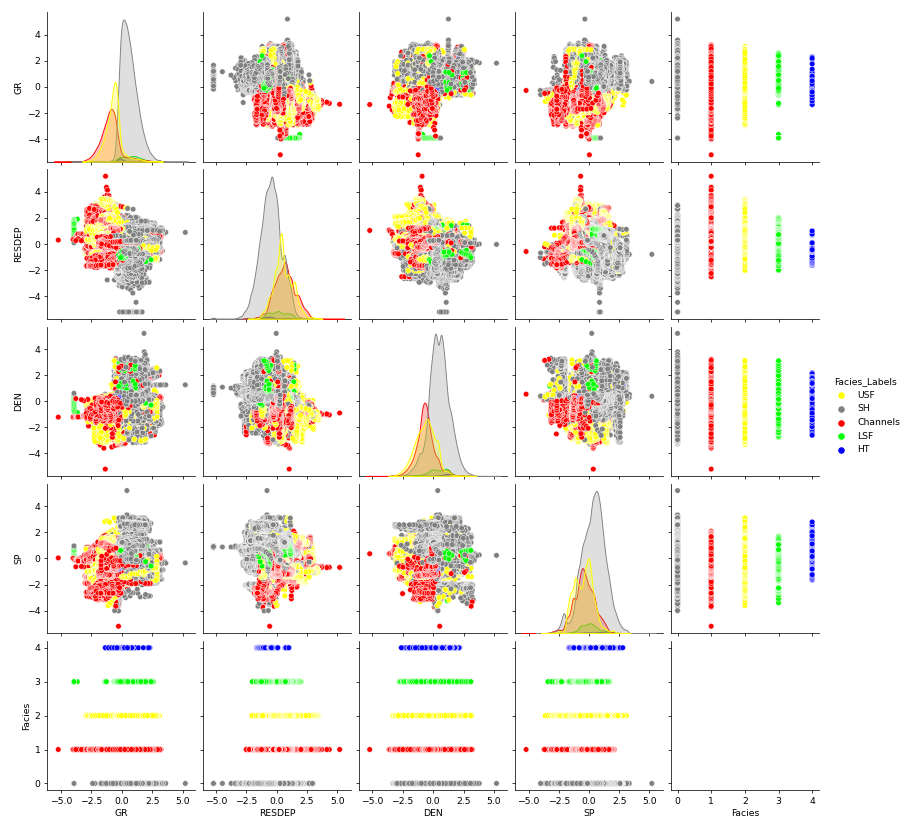

In [117]:
#Update facies_colors based on the unique values in the transformed 'Facies_Labels' column
facies_colors_scaled = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Assuming 'data_transformed' is your DataFrame containing the transformed data
vars_of_interest_scaled = ['Facies_Labels', 'GR', 'RESDEP', 'DEN', 'SP', 'Facies']
subset_data_transformed_quantile_D = data_transformed_quantile_D[vars_of_interest_scaled]

# Use pairplot to create a plot matrix for the transformed scaled data
sns.pairplot(subset_data_transformed_quantile_D, hue='Facies_Labels', palette=facies_colors_scaled)
plt.suptitle('Plot Matrix of Lithofacies and Transformed Well Log Variables', y=1.02)
plt.show()

<IPython.core.display.Javascript object>


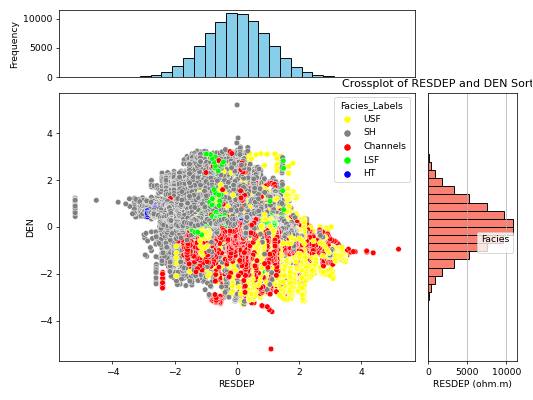

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'Facies' with the actual column name containing facies information

plt.figure(figsize=(8, 6))

facies_colors = ['#FFFF00', '#808080', '#FF0000', '#00FF00', '#0000FF' ]

# Create 2x2 grid for the main plot and histograms
gs = plt.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])

# Scatter plot with different colors for each facies
ax_main = plt.subplot(gs[1, 0])
sns.scatterplot(x='RESDEP', y='DEN', hue='Facies_Labels', data=data_transformed_quantile_D, palette=facies_colors, ax=ax_main)

# Histogram for RESDEP along the top
ax_top = plt.subplot(gs[0, 0], sharex=ax_main)
ax_top.hist(data_transformed_quantile_D['RESDEP'], bins=30, color='skyblue', edgecolor='black')
ax_top.set(ylabel='Frequency')
ax_top.get_xaxis().set_visible(False)  # Hide x-axis labels

# Histogram for DEN along the right
ax_right = plt.subplot(gs[1, 1], sharey=ax_main)
ax_right.hist(data_transformed_quantile_D['DEN'], bins=30, color='salmon', edgecolor='black', orientation='horizontal')
ax_right.set(xlabel='Frequency')
ax_right.get_yaxis().set_visible(False)  # Hide y-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()

plt.xlabel('RESDEP (ohm.m)')
plt.ylabel('DEN (g/m³)')
plt.title('Crossplot of RESDEP and DEN Sorted by Facies')

plt.legend(title='Facies', bbox_to_anchor=(0.5, 0.5), loc='upper left')

plt.grid(True)
plt.show()

In [79]:
columns_to_transform

['GR', 'RESDEP', 'DEN', 'SP']

In [80]:
from sklearn.preprocessing import QuantileTransformer

# Assuming 'feature_vectors' is your data
# Initialize the QuantileTransformer with a Gaussian distribution
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit the transformer on the data and transform the features
scaled_features_quantile = quantile_transformer.fit_transform(feature_vectors)

# Display the transformed features
print(scaled_features_quantile)


[[-0.82801169  0.98835697 -0.61578113  1.05717115]
 [-0.70239003  0.97603466 -0.4290136   1.0472981 ]
 [-0.66849109  0.96473455 -0.36724446  1.02850217]
 ...
 [ 0.82317161  0.00250914  0.40744067  0.32649345]
 [ 1.20493543 -0.07534535  0.40789568  0.33030656]
 [ 1.25301616 -0.08415915  0.40789568  0.32649345]]


# Create training set and test set

In [81]:
# Split to test and training data, test will be used to compare the accuracy of the model, since we the facies of the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features_quantile, correct_facies_labels, test_size=0.2, random_state=42)

In [82]:
from sklearn.model_selection import cross_val_score

# Train the SVM classifier

In [83]:
#Training the classifier
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [84]:
#Predict
predicted_labels = clf.predict(X_test)

In [85]:
predicted_labels

array([0, 0, 0, ..., 2, 1, 0])

In [86]:
unique_elements, counts = np.unique(predicted_labels, return_counts=True)
occurrences_dict = dict(zip(unique_elements, counts))

# Print or use the occurrences
print(occurrences_dict)

{0: 9614, 1: 2741, 2: 3588, 3: 7}


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)
cm

array([[8110,   20,  237,    2,    0],
       [ 419, 1880, 1072,    0,    0],
       [ 520,  826, 2234,    0,    0],
       [ 382,   14,   36,    5,    0],
       [ 183,    1,    9,    0,    0]], dtype=int64)

In [90]:
 Display confusion matrix
display_cm(cm, labels=facies_labels = ['Channels', 'USF', 'LSF', 'HT', 'SH'])

SyntaxError: invalid syntax (3597208691.py, line 1)

In [92]:
import numpy as np

def display_cm(cm, labels, hide_zeros=False, display_metrics=False):
    """
    Display confusion matrix with facies labels and optional error metrics.

    Parameters:
    - cm: Confusion matrix (numpy array)
    - labels: List of facies labels
    - hide_zeros: Whether to hide cells with zero values (default: False)
    - display_metrics: Whether to display precision, recall, and F1 score (default: False)
    """
    precision = np.diagonal(cm) / cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm) / cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)

    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0

    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0, 1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0, 1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0, 1))

    columnwidth = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth

    # Print header
    print("    " + " Pred", end=' ')
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')

    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)):
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i, :]))

    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)

# Example usage:
facies_labels = ['SH', 'Channels', 'USF', 'HT', 'LSF']

display_cm(cm, facies_labels, hide_zeros=True, display_metrics=True)


     Pred       SH Channels      USF       HT      LSF    Total
          SH     8110       20      237        2              8369
    Channels      419     1880     1072                       3371
         USF      520      826     2234                       3580
          HT      382       14       36        5               437
         LSF      183        1        9                        193

Precision     0.84     0.69     0.62     0.71     0.00     0.75
   Recall     0.97     0.56     0.62     0.01     0.00     0.77
       F1     0.90     0.62     0.62     0.02     0.00     0.74


In [88]:
def accuracy(conf):
    """Calculate the accuracy given a confusion matrix."""
    total_correct = np.sum(np.diagonal(conf))
    total = np.sum(conf)
    return total_correct / total

# Assuming 'cm' is your confusion matrix
print('Facies prediction accuracy on test set: %f' % accuracy(cm))

Facies prediction accuracy on test set: 0.766708


In [89]:
import numpy as np

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0, nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            if j < nb_classes:  # Check if the index is valid
                total_correct += conf[i][j]
    return total_correct / sum(sum(conf))

# Provided adjacent facies
facies_neighbors = [[1], [0, 2], [1], [4], [3, 5], [4, 6, 7], [5, 7], [5, 6, 8], [6, 7]]

# Calculate and print adjusted accuracy
adjusted_accuracy = accuracy_adjacent(cm, facies_neighbors)
print('Adjusted facies prediction accuracy on the test set: %f' % adjusted_accuracy)

Adjusted facies prediction accuracy on the test set: 0.913229


In [93]:
data

Depth          GR         SP     DEN     RESDEP  Facies Well_name  \
1000    6500.5   40.834099  71.804199  2.2734  27.702000       2    OBOM-1   
1001    6501.0   45.631100  71.661797  2.3010  27.178900       2    OBOM-1   
1002    6501.5   47.282700  71.489899  2.3119  26.382900       2    OBOM-1   
1003    6502.0   51.463501  71.490196  2.3446  25.580299       2    OBOM-1   
1004    6502.5   55.879501  70.979301  2.3817  24.596100       2    OBOM-1   
...        ...         ...        ...     ...        ...     ...       ...   
258066  8798.0   91.050003  54.827770  2.3881   9.135000       0   OBOM-13   
258067  8798.5   92.940002  55.007641  2.4652   9.322400       0   OBOM-13   
258068  8799.0   95.302498  55.187481  2.5110   9.607500       0   OBOM-13   
258069  8799.5  100.500000  53.612499  2.5111   9.670500       0   OBOM-13   
258070  8800.0  101.208702  53.447491  2.5111   9.607500       0   OBOM-13   

        POR lithofacies Facies_Labels Reservoir_Status  
1000    NaN         USF           USF        Reservoir  
1001    NaN         USF           USF        Reservoir  
1002    NaN         USF           USF        Reservoir  
1003    NaN         USF           USF        Reservoir  
1004    NaN         USF           USF        Reservoir  
...     ...         ...           ...              ...  
258066  NaN       Shale            SH    Non-Reservoir  
258067  NaN       Shale            SH    Non-Reservoir  
258068  NaN       Shale            SH    Non-Reservoir  
258069  NaN       Shale            SH    Non-Reservoir  
258070  NaN       Shale            SH    Non-Reservoir  

[79746 rows x 11 columns]

In [94]:
X_train

array([[ 1.29927344,  2.34277735, -1.18260711, -0.79363519],
       [ 0.24026797,  0.85258444,  0.65804298, -0.13284859],
       [-1.38147086,  0.1886391 , -1.26211405,  0.50835829],
       ...,
       [-1.38625264, -1.04874761, -1.38398261,  0.30623072],
       [-0.67676655, -0.13516621, -0.38651927,  1.33532771],
       [ 0.3453086 ,  0.16382378,  1.68942041, -1.22064035]])

In [95]:
cm

array([[8110,   20,  237,    2,    0],
       [ 419, 1880, 1072,    0,    0],
       [ 520,  826, 2234,    0,    0],
       [ 382,   14,   36,    5,    0],
       [ 183,    1,    9,    0,    0]], dtype=int64)

In [127]:
y_train

array([0, 0, 1, ..., 2, 2, 3])

### Optimize SVM parameters by cross validation

In [164]:
# This function returns the classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
def accuracy(cm):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
    result = n_correct/sum(sum(cm))
    return result

# This function returns the adjusted classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
#     adj      adjacent facies
def accuracy_adj(cm, adj):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
        for j in adj[i]:
            n_correct += cm[i][j - 1]
    result = n_correct/sum(sum(cm))
    return result

In [185]:
from sklearn import svm
model_selection = True


# Parameters C and gamma for radial basis function 'rbf' in SVM
if model_selection:
    test_gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    test_c = [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000]
    
    n_gamma = len(test_gamma)
    n_c = len(test_c)
    n_cv = n_gamma * n_c
    err_train = np.zeros(n_cv).reshape(n_gamma, n_c)
    err_cv = np.zeros(n_cv).reshape(n_gamma, n_c)

# CV can be implemented by parallel computing
    i_cv = 0
    for j, gamma in enumerate(test_gamma):
        for i, c in enumerate(test_c):
            clf = svm.SVC(C=c, gamma=gamma)
            clf.fit(X_train, y_train)
            
            cm_train = confusion_matrix(y_train, clf.predict(X_train))
            cm_cv = confusion_matrix(y_test, clf.predict(X_test))
            
            err_train[j][i] = accuracy(cm_train)
            err_cv[j][i] = accuracy(cm_cv)
            
            i_cv += 1
            progress = int(i_cv/n_cv*100)
            print('CV progress: {}%'.format(progress), end='\r', flush=True)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


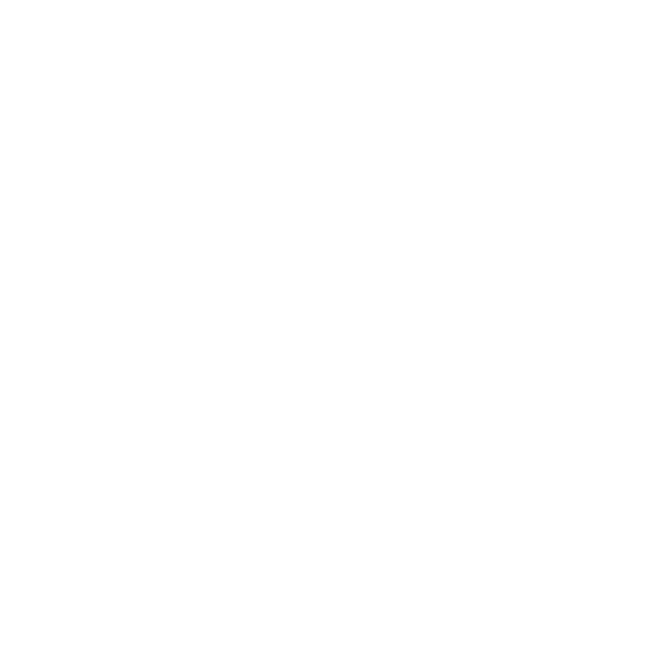

In [166]:
# Plot CV errors vs. train errors for parameter selection
if model_selection:
    n_plot = n_gamma
    
    n_col = 2
    n_row = int(n_plot / n_col)
    
    fig, axes = plt.subplots(n_row, n_col, sharex = 'col', sharey = 'row', figsize = (10, 10))
    
    for i_plot in np.arange(0, n_plot):
        i_row = int(i_plot / n_col)
        i_col = int(i_plot % n_col)
        ax = axes[i_row, i_col]
        ax.set_title('Parameter gamma: %g' % test_gamma[i_plot])
        ax.semilogx(test_c, err_train[i_plot], label = 'Train error')
        ax.semilogx(test_c, err_cv[i_plot], label = 'CV error')
        ax.set_ylim([0.2, 1.0])
        
    ax.legend(bbox_to_anchor = (1.5, 1.7), loc = 'center right', borderaxespad = 0.)
    fig.text(0.5, 0.06, 'Parameter C', ha = 'center', fontsize = 14)
    fig.text(0.05, 0.5, 'CV accuracy', va = 'center', rotation = 'vertical', fontsize = 14)

In [167]:
print('Facies prediction accuracy on test set: %f' % accuracy(cm))

Facies prediction accuracy on test set: 0.407585


In [168]:
display_cm(cm, facies_labels, 
           display_metrics=True, hide_zeros=True)

     Pred       SH Channels      USF       HT      LSF    Total
          SH     3579                                         3579
    Channels     2221                                         2221
         USF     2219                                         2219
          HT      234                                          234
         LSF      528                                          528

Precision     0.41     0.00     0.00     0.00     0.00     0.17
   Recall     1.00     0.00     0.00     0.00     0.00     0.41
       F1     0.58     0.00     0.00     0.00     0.00     0.24


In [169]:
facies_colors = [ '#808080', '#FF0000', '#FFFF00', '#00FF00', '#0000FF', '#808080']

In [170]:
# This function plots log dataset
# Arguments:
#     data_filtered      input clean dataset
#     vars      input variables to compare (e.g. ['Facies', 'Predictions'])
#     label     input facies names
#     color     input facies colors
def plot_data(data_filtered, vars, label, color):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    data = data_filtered.sort_values(by = 'Depth')
    name = ['GR', 'SP', 'DEN', 'RESDEP',]
    cmap = colors.ListedColormap(color[0:len(color)], 'indexed')
    
    zmin = data.Depth.min()
    zmax = data.Depth.max()
    
    panel = {}
    for i, var in enumerate(vars):
        panel[i] = np.repeat(np.expand_dims(data[var].values, 1), 100, 1)
        
    m = len(name)
    nvars = len(vars)
    
    f, ax = plt.subplots(nrows = 1, ncols = m + nvars, figsize = [7 + nvars, 12])
    ax[0].plot(data[name[0]], data.Depth, '-g')
    ax[1].plot(data[name[1]], data.Depth, '-')
    ax[2].plot(data[name[2]], data.Depth, '-', color = '0.5')
    ax[3].plot(data[name[3]], data.Depth, '-r')
    
    im = {}
    for i in range(nvars):
        im[i] = ax[m + i].imshow(panel[i], interpolation = 'none', aspect = 'auto', cmap = cmap, vmin = 1, vmax = 5)
    
    legend = make_axes_locatable(ax[m + nvars - 1])
    cax = legend.append_axes('right', size = '20%', pad = 0.05)
    cbar = plt.colorbar(im[0], cax = cax)
    cbar.set_label((17*' ').join(label))
    cbar.set_ticks(range(0, 1))
    cbar.set_ticklabels('')
    
    for i in range(len(ax) - nvars):
        ax[i].set_ylim(zmin, zmax)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis = 'x', nbins = 3)
        ax[i].set_xlabel(name[i])
        ax[i].set_xlim(data[name[i]].min(), data[name[i]].max())
        ax[i + 1].set_yticklabels([])
        
    for i, var in enumerate(vars):
        ax[m + i].set_xlabel(var)
        ax[m + i].set_xticklabels([])
        
    ax[0].set_ylabel('Depth', fontsize = 12)
    
    f.suptitle('Well: %s' % data['Well_name'].unique()[0], fontsize = 12, y = 0.9)

<IPython.core.display.Javascript object>


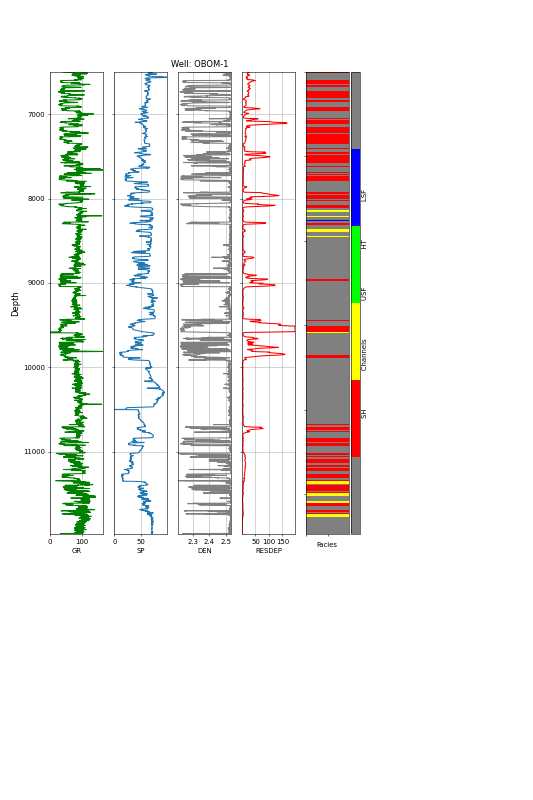

<IPython.core.display.Javascript object>


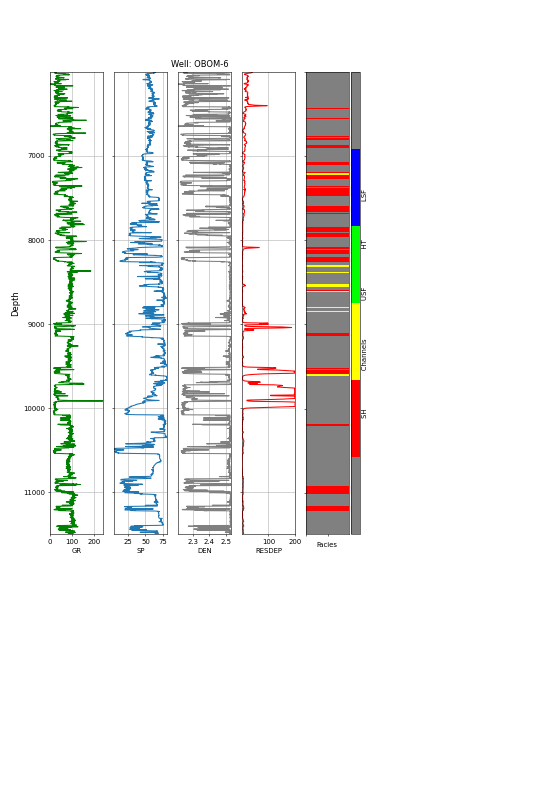

In [171]:
# Plot clean dataset
# SS - nonmarine sandstone   CSiS - nonmarine coarse siltstone   FSis - nonmarine fine siltstone
# SiSh - marine siltstone and shale   MS - mudstone (limestone)   WS - wackestone (limestone)
# D - dolomite   PS - packstone (limestone)   BS - bafflestone (limestone)


#plot_clean_data(clean_data[clean_data['Well Name'] == 'SHRIMPLIN'], facies
plot_data(data_filtered[data_filtered['Well_name'] == 'OBOM-1'], ['Facies'], facies_labels, facies_colors)
plot_data(data_filtered[data_filtered['Well_name'] == 'OBOM-6'], ['Facies'], facies_labels, facies_colors)

### Apply optimized SVM model to blind test

In [172]:
blind = pd.read_csv(r"C:\Users\lenovo\Downloads\blind.csv")

In [173]:
blind

Depth         GR         SP     DEN   RESDEP  Facies Well_name  POR  \
0      6000.0  63.408699  50.769791  2.5055  10.3935       1    OBOM-4  NaN   
1      6000.5  61.046200  50.454269  2.4960  11.3384       1    OBOM-4  NaN   
2      6001.0  60.337502  50.295261  2.4926  12.1888       1    OBOM-4  NaN   
3      6001.5  62.227501  49.980999  2.5010  13.3857       1    OBOM-4  NaN   
4      6002.0  63.753399  49.813370  2.5067  13.9715       1    OBOM-4  NaN   
...       ...        ...        ...     ...      ...     ...       ...  ...   
8776  10395.0  78.927101  71.144638  2.5257   1.2069       0    OBOM-4  NaN   
8777  10395.5  80.227798  71.143333  2.5261   1.2066       0    OBOM-4  NaN   
8778  10396.0  81.292999  70.670181  2.5264   1.2065       0    OBOM-4  NaN   
8779  10396.5  82.869102  70.353928  2.5269   1.2062       0    OBOM-4  NaN   
8780  10397.0  86.020699  70.568787  2.5278   1.2344       0    OBOM-4  NaN   

     lithofacies Facies_Labels Reservoir_Status  
0       Channels      Channels        Reservoir  
1       Channels      Channels        Reservoir  
2       Channels      Channels        Reservoir  
3       Channels      Channels        Reservoir  
4       Channels      Channels        Reservoir  
...          ...           ...              ...  
8776       Shale            SH    Non-Reservoir  
8777       Shale            SH    Non-Reservoir  
8778       Shale            SH    Non-Reservoir  
8779       Shale            SH    Non-Reservoir  
8780       Shale            SH    Non-Reservoir  

[8781 rows x 11 columns]

### Conditioning the blind data

In [174]:
# Create predictor variables and outcome variable
predictors = blind.drop(['Facies', 'lithofacies', 'Facies_Labels', 'Well_name', 'POR', 'Depth', 'Reservoir_Status' ], axis = 1)
outcome = blind['Facies'].values
predictors.describe()

GR           SP          DEN       RESDEP
count  8781.000000  8781.000000  8781.000000  8781.000000
mean     60.002338    45.790999     2.438999     8.419192
std      22.757041    20.438730     0.112635    13.345505
min      13.353700    -2.917357     2.217700     0.781800
25%      38.350201    34.308411     2.324000     1.939800
50%      68.270203    46.211121     2.517900     3.556600
75%      78.056198    64.383530     2.525400    10.643500
max     146.568802    76.247971     2.534100   136.382599

In [175]:
predictors

GR         SP     DEN   RESDEP
0     63.408699  50.769791  2.5055  10.3935
1     61.046200  50.454269  2.4960  11.3384
2     60.337502  50.295261  2.4926  12.1888
3     62.227501  49.980999  2.5010  13.3857
4     63.753399  49.813370  2.5067  13.9715
...         ...        ...     ...      ...
8776  78.927101  71.144638  2.5257   1.2069
8777  80.227798  71.143333  2.5261   1.2066
8778  81.292999  70.670181  2.5264   1.2065
8779  82.869102  70.353928  2.5269   1.2062
8780  86.020699  70.568787  2.5278   1.2344

[8781 rows x 4 columns]

In [176]:
# Assuming 'X_blind' is your data array
# Use the pre-fitted QuantileTransformer for the transformation
X_blind = quantile_transformer.transform(predictors)
y_blind = outcome

In [177]:
X_train

array([[ 1.29927344,  2.34277735, -1.18260711, -0.79363519],
       [ 0.24026797,  0.85258444,  0.65804298, -0.13284859],
       [-1.38147086,  0.1886391 , -1.26211405,  0.50835829],
       ...,
       [-1.38625264, -1.04874761, -1.38398261,  0.30623072],
       [-0.67676655, -0.13516621, -0.38651927,  1.33532771],
       [ 0.3453086 ,  0.16382378,  1.68942041, -1.22064035]])

### Blind test using SVM model

In [186]:
# Now you can make predictions on the blind test data
y_predict = clf.predict(X_blind)

AttributeError: 'SVC' object has no attribute 'support_vectors_'

In [179]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_blind, y_predict)

In [180]:
print('Facies prediction accuracy on blind test: %f' % accuracy(cm))

Facies prediction accuracy on blind test: 0.407585


In [181]:
print('Adjusted facies prediction accuracy on blind test: %f' % accuracy_adjacent(cm, facies_neighbors))

Adjusted facies prediction accuracy on blind test: 0.660517


<IPython.core.display.Javascript object>


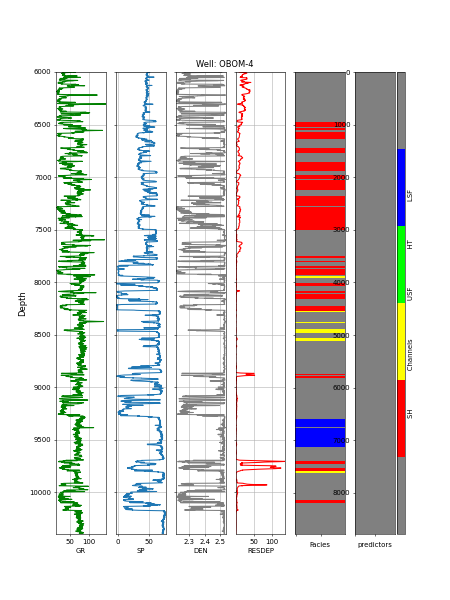

In [182]:
# Plot the predict facies vs. the true facies
blind['predictors'] = y_predict
plot_data(blind, ['Facies', 'predictors'], facies_labels, facies_colors)

In [124]:
blind.head(50)

Depth         GR         SP     DEN     RESDEP  Facies Well_name  POR  \
0   6000.0  63.408699  50.769791  2.5055  10.393500       1    OBOM-4  NaN   
1   6000.5  61.046200  50.454269  2.4960  11.338400       1    OBOM-4  NaN   
2   6001.0  60.337502  50.295261  2.4926  12.188800       1    OBOM-4  NaN   
3   6001.5  62.227501  49.980999  2.5010  13.385700       1    OBOM-4  NaN   
4   6002.0  63.753399  49.813370  2.5067  13.971500       1    OBOM-4  NaN   
5   6002.5  65.062500  49.665501  2.5107  14.855600       1    OBOM-4  NaN   
6   6003.0  62.227501  49.192410  2.5010  16.125999       1    OBOM-4  NaN   
7   6003.5  56.793800  49.418320  2.4727  17.322901       1    OBOM-4  NaN   
8   6004.0  52.068802  49.664261  2.4387  18.425301       1    OBOM-4  NaN   
9   6004.5  47.343700  48.403751  2.3993  17.302500       1    OBOM-4  NaN   
10  6005.0  45.689999  48.210220  2.3850  18.876801       1    OBOM-4  NaN   
11  6005.5  44.981201  48.088261  2.3788  22.025801       1    OBOM-4  NaN   
12  6006.0  40.256302  47.300220  2.3390  24.230000       1    OBOM-4  NaN   
13  6006.5  35.531200  48.087231  2.3035  25.174500       1    OBOM-4  NaN   
14  6007.0  33.783501  48.087009  2.2919  26.577999       1    OBOM-4  NaN   
15  6007.5  31.514999  47.299000  2.2782  28.323000       1    OBOM-4  NaN   
16  6008.0  30.333799  45.723480  2.2717  29.345900       1    OBOM-4  NaN   
17  6008.5  30.806200  45.723270  2.2743  30.526501       1    OBOM-4  NaN   
18  6009.0  31.514999  45.723011  2.2782  30.981800       1    OBOM-4  NaN   
19  6009.5  31.514999  45.722500  2.2782  31.469999       1    OBOM-4  NaN   
20  6010.0  30.806200  45.722141  2.2743  31.469000       1    OBOM-4  NaN   
21  6010.5  29.585100  46.078609  2.2678  30.387100       1    OBOM-4  NaN   
22  6011.0  28.443800  46.508709  2.2622  28.947800       1    OBOM-4  NaN   
23  6011.5  27.812700  46.508450  2.2592  27.998800       1    OBOM-4  NaN   
24  6012.0  27.262501  46.508072  2.2568  27.138700       1    OBOM-4  NaN   
25  6012.5  27.262501  46.507721  2.2568  26.278700       1    OBOM-4  NaN   
26  6013.0  27.262501  46.069271  2.2568  25.795000       1    OBOM-4  NaN   
27  6013.5  30.806200  45.719452  2.2743  26.208900       1    OBOM-4  NaN   
28  6014.0  33.376900  46.118301  2.2893  26.496799       1    OBOM-4  NaN   
29  6014.5  36.240002  46.506100  2.3084  26.737499       1    OBOM-4  NaN   
30  6015.0  35.517799  46.505741  2.3034  26.991100       1    OBOM-4  NaN   
31  6015.5  34.862202  46.505451  2.2989  27.209000       1    OBOM-4  NaN   
32  6016.0  34.349998  46.505081  2.2955  27.365200       1    OBOM-4  NaN   
33  6016.5  32.153999  46.504700  2.2819  26.424200       1    OBOM-4  NaN   
34  6017.0  30.806200  46.504089  2.2743  25.690800       1    OBOM-4  NaN   
35  6017.5  31.257401  46.236912  2.2768  25.157900       1    OBOM-4  NaN   
36  6018.0  31.514999  45.715851  2.2782  24.391199       1    OBOM-4  NaN   
37  6018.5  31.051901  45.715591  2.2756  23.580900       1    OBOM-4  NaN   
38  6019.0  30.806200  45.715351  2.2743  23.187000       1    OBOM-4  NaN   
39  6019.5  30.806200  46.029690  2.2743  22.584801       1    OBOM-4  NaN   
40  6020.0  30.806200  45.683670  2.2743  22.003901       1    OBOM-4  NaN   
41  6020.5  30.806200  45.241581  2.2743  22.003099       1    OBOM-4  NaN   
42  6021.0  30.806200  45.689701  2.2743  22.002399       1    OBOM-4  NaN   
43  6021.5  30.333799  46.028339  2.2717  22.001600       1    OBOM-4  NaN   
44  6022.0  30.478300  45.842651  2.2725  22.000799       1    OBOM-4  NaN   
45  6022.5  30.690300  45.712589  2.2736  22.000401       1    OBOM-4  NaN   
46  6023.0  30.806200  44.924671  2.2743  20.424200       1    OBOM-4  NaN   
47  6023.5  32.988800  45.239170  2.2869  20.423500       1    OBOM-4  NaN   
48  6024.0  34.349998  45.489792  2.2955  20.422300       1    OBOM-4  NaN   
49  6024.5  35.531200  45.711071  2.3035  20.042500       1    OBOM-4  NaN   

   lithofacies Facies_Labe

In [184]:
# Save the DataFrame to a CSV file
blind.to_csv('blind_filtered.csv', index=False) 